# Universidad Nacional de Córdoba 
# Facultad de Matemática, Astronomía, Física y Computación
# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2022
# Predicción de incidendes viales en la ciudad de Medellin

> Mentora: Isabel Mejia

> Estudiantes: Candela Spitale | Gustavo Venchiarutti | Carina Giovine


Se trabaja con un dataset del portal de datos de la ciudad de Medellin-MEData
[Victimas de Incidentes viales](http://medata.gov.co/dataset/v%C3%ADctimas-en-incidentes-viales)





#Informe de Análisis y Visualización
# General
**Se propone la elaboración de un informe o presentación en formato estatico  deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema.**

**No hay límites respecto a la extensión, pero se valorará el poder de síntesis y de comunicación, así como el uso de las herramientas pertinentes para comunicar.**

In [339]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [340]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl 
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import fiona
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [341]:
URL = 'https://drive.google.com/file/d/1ln0I-cyh7-sxqUTnp1zIEYst8mGp8lOj/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
invia_df = pd.read_csv(path, sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (11,14) have mixed types.Specify dtype option on import or set low_memory=False.



In [342]:
invia_df

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,1/1/2014,00:15:00,Otro,CR 49 CL 72,M,17,Motociclista,Ene,Mié,1,0,oct-19,2014,1423940,"6,26691466","-75,5590994",04 - Aranjuez,Manrique Central No. 1
1,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,Ene,Mié,1,0,20 - 29,2014,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
2,Heridos,1/1/2014,00:30:00,Atropello,CR 46 CL 98,F,18,Peatón,Ene,Mié,1,0,oct-19,2014,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
3,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,Ene,Mié,1,0,oct-19,2014,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes
4,Heridos,1/1/2014,00:37:00,Atropello,CL 32 CR 84,M,39,Peatón,Ene,Mié,1,0,30 - 39,2014,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235838,Heridos,30/9/2021,22:00:00,Otro,CL 54 CR 9 A,M,32,Motociclista,Sep,Jue,30,22,30 - 39,2021,1764135,"-75,53631071","6,23426695",08 - Villa Hermosa,Las Estancias
235839,Heridos,30/9/2021,22:00:00,Otro,CL 54 CR 9 A,F,29,Acompañante de motocicleta,Sep,Jue,30,22,20 - 29,2021,1764135,"-75,53631071","6,23426695",08 - Villa Hermosa,Las Estancias
235840,Heridos,30/9/2021,22:00:00,Caida Ocupante,CL 81 CR 39,M,41,Acompañante de motocicleta,Sep,Jue,30,22,40 - 49,2021,1763968,"-75,54867484","6,272697",03 - Manrique,Santa Inés
235841,Heridos,30/9/2021,23:00:00,Atropello,CR 63 CL 32,F,51,Peatón,Sep,Jue,30,23,50 - 59,2021,1764133,Sin Inf,Sin Inf,Sin Inf,NaN


In [343]:
# Hacemos los gráficos más grandes (tamaño de la etiqueta, lineas, etc), adecuados para proyector
sns.set_context(context='talk', font_scale=1.2)


## 1. Análisis descriptivo Dataset

###Seccion 1 --> Data Frame

**¿Cuántas son las entradas del dataset y qué representa cada una de ellas? Realicemos una breve descripción del dataset.**

In [344]:
# Obtenemos la cantidad de filas y columnas del Dataset original
tamaño = invia_df.shape
print("Nuestro Dataset original tiene", tamaño[0], "filas y", tamaño[1],"columnas.")

Nuestro Dataset original tiene 235843 filas y 19 columnas.


In [345]:
# Analizamos los tipos de objetos contenidos en nuestro dataframe
invia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235843 entries, 0 to 235842
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gravedad_victima     235843 non-null  object
 1   Fecha_incidente      235843 non-null  object
 2   Hora_incidente       235843 non-null  object
 3   Clase_incidente      235843 non-null  object
 4   Direccion_incidente  235831 non-null  object
 5   Sexo                 235843 non-null  object
 6   Edad                 235335 non-null  object
 7   Condicion            235843 non-null  object
 8   Mes                  235843 non-null  object
 9   Dia                  235843 non-null  object
 10  Num_dia              235843 non-null  int64 
 11  Hora                 235843 non-null  object
 12  Grupo_edad           235843 non-null  object
 13  Año                  235843 non-null  int64 
 14  Radicado             235838 non-null  object
 15  Latitud              235843 non-nu

Verificando la conformación del dataframe a analizar, vemos varios campos que necesitamos transformar de **object** a **int** o a **float**

In [346]:
# Analizamos si tenemos registros nulos
invia_df.isnull().sum()

Gravedad_victima         0
Fecha_incidente          0
Hora_incidente           0
Clase_incidente          0
Direccion_incidente     12
Sexo                     0
Edad                   508
Condicion                0
Mes                      0
Dia                      0
Num_dia                  0
Hora                     0
Grupo_edad               0
Año                      0
Radicado                 5
Latitud                  0
Longitud                 0
Comuna                   0
Barrio                 618
dtype: int64

In [347]:
# Realizamos una exploración de nuestro dataframe verificando por cada variable 
# sus valores únicos
print('\n Gravedad_victima = {}'.format(invia_df.Gravedad_victima.unique()))
print('\n Fecha_incidente = {}'.format(invia_df.Fecha_incidente.unique()))
print('\n Hora_incidente = {}'.format(invia_df.Hora_incidente.unique()))
print('\n Clase_incidente = {}'.format(invia_df.Clase_incidente.unique()))
print('\n Direccion_incidente = {}'.format(invia_df.Direccion_incidente.unique()))
print('\n Sexo = {}'.format(invia_df.Sexo.unique()))
print('\n Edad = {}'.format(invia_df.Edad.unique()))
print('\n Condicion = {}'.format(invia_df.Condicion.unique()))
print('\n Mes = {}'.format(invia_df.Mes.unique()))
print('\n Dia = {}'.format(invia_df.Dia.unique()))
print('\n Num_dia = {}'.format(invia_df.Num_dia.unique()))
print('\n Hora = {}'.format(invia_df.Hora.unique()))
print('\n Grupo_edad = {}'.format(invia_df.Grupo_edad.unique()))
print('\n Año = {}'.format(invia_df.Año.unique()))
print('\n Radicado = {}'.format(invia_df.Radicado.unique()))
print('\n Latitud = {}'.format(invia_df.Latitud.unique()))
print('\n Longitud = {}'.format(invia_df.Longitud.unique()))
print('\n Comuna = {}'.format(invia_df.Comuna.unique()))
print('\n Barrio = {}'.format(invia_df.Barrio.unique()[:10]))


 Gravedad_victima = ['Heridos' 'Muertos']

 Fecha_incidente = ['1/1/2014' '2/1/2014' '3/1/2014' ... '28/9/2021' '29/9/2021' '30/9/2021']

 Hora_incidente = ['00:15:00' '00:30:00' '00:37:00' ... '01:18:00' '03:53:00' '02:07:00']

 Clase_incidente = ['Otro' 'Atropello' 'Choque' 'Caida Ocupante' 'Volcamiento' 'Incendio']

 Direccion_incidente = ['CR 49 CL 72' 'CR 46 CL 98' 'CL 32 CR 84' ... 'CR 49 DG 50'
 'DG 75 B CL 76' 'CL 28 A CR 65 A']

 Sexo = ['M' 'F' 'Sin Inf' 'Sin inf']

 Edad = ['17' '20' '18' '19' '39' '44' '7' '35' '51' '30' 'Sin Inf' '34' '26' '29'
 '27' '32' '33' '24' '23' '36' '25' '28' '52' '38' '61' '58' '22' '73'
 '21' '5' '31' '4' '14' '63' '50' '49' '59' '54' '85' '6' '46' '62' '15'
 '41' '16' '2' '47' '37' '83' '55' '13' '65' '3' '72' '57' '9' '45' '12'
 '82' '43' '1' '40' '53' '56' '0' '8' '76' '71' '42' '11' '64' '67' '70'
 '66' '77' '48' '78' '68' '74' '10' '60' '79' '75' '69' '91' '81' '88'
 '89' '86' '90' '84' '80' '87' '92' '98' '95' '94' '97' '93' '96' '118'
 '

**Descripción de cada columna que forma parte del Dataset**

>**Gravedad_victima**: --> object. Representa valores tales como *heridos* y *muertos*. Sin datos faltantes o nulos.

>**Fecha_incidente**: --> object. Representa la fecha en la que ocurrió el evento.  Requiere la conversión de dato a tipo date-time.  Sin datos nulos.

>**Hora_incidente**: --> object. Indica la hora en que se produce del evento.  Sin datos nulos.

>**Clase_incidente**: --> object. Representa el tipo de incidente y puede ser: *'Otro'*, *'Atropello'*, *'Choque'*, *'Caida Ocupante'*, *'Volcamiento'*, *'Incendio'*. Sin datos nulos.

>**Direccion_incidente**: --> object. Indica el lugar donde se produjo el accidente, especificando CR(carretera) y CL(calle). El data frame tiene 12 valores nulos.

>**Sexo**: --> object. Indica el sexo de la persona involucrada en el accidente. Toma valores tales como *'hombre'*, *'mujer'* y *'sin información'*. Sin datos nulos.

>**Edad**: --> object. Indica el sexo de la persona involucrada en el accidente.Variable que contiene numeros, algunos con valor 0 y otros registros con rangos de edades. Deberiamos tranformar a int en el transcurso del análisis. El data frame tiene 508 valores nulos, se podrian completar considerando un promedio del campo **Grupo_edad**.

>**Condicion**: --> object. Indica la condicion de la persona accidentada. La variable toma los siguientes valores: *'Motociclista'*, *'Peatón'*, *'Acompañante de Motocicleta'*, *'Conductor'*, *'Ciclista'*, *'Pasajero'*, *'Acompañante de motocicleta'*. Como vemos tenemos que unificar Acompañante de motocicleta y Acompañante de Motocicleta para que tomen un solo valor.  Sin datos nulos.

>**Mes**: --> object. Indica el mes que se produce el accidente. La variable toma los siguientes valores: *'Ene'*, *'Feb'*, *'Mar'*, *'Abr'¨*, *'May'*, *'Jun'*, *'Jul'*, *'Ago'*, *'Sept'*, *'Oct'*, *'Nov'*, *'Dic'*, *'Sep'*.Como vemos tenemos que unificar 'Sept' 'Sep'. Sin datos nulos.

>**Dia**: --> object. Identifica el dia de la semana en que se produce el accidente. La variable toma los siguientes valores: *'Mié'*, *'Jue'*, *'Vie'*, *'Sáb'*, *'Dom'*, *'Lun'*, *'Mar'*. Sin datos nulos.

>**Num_dia**: --> int. Identifica el numero del dia del mes que se produce el accidente. La variable toma valores emteros del *1* al *31*. Sin datos nulos pero tenemos que analizar que existen registros con valor 0.

>**Hora**: --> object. Identifica la hora del dia en la que se produce el accidentes. La varible toma valores numericos que van de *0* a *23* y tambien valores caracteres que van desde *'0'* a *'23'*. Tambien tenemos registros con valores 'Sin Inf'. Deberiamos pasar todo a integer y completar los valores Sin Inf utilizando los datos del campo **Hora_incidente**. Sin datos nulos.

>**Grupo_edad**: --> object. Identifica el rango etario de la pesona involucrada en el incidente. La variable toma los siguientes valores: *'oct-19'*, *'20 - 29'*, *'30 - 39'*, *'40 - 49'*, *'0 - 9'*, *'50 - 59'*, *'Sin Inf'*, *'60 - 69'*, *'70 - 79'*, *'80 o más'*. Particularmente los valores del rango que son 'oct-19' debemos reemplazar el oct por 10 y los registros 'Sin Inf' completar con la informacion del campo **Edad** siempre que no sea nulo. Sin datos nulos.

>**Año**: --> int. Representa el año en que se produjo el incidente. La variable toma los siguientes valores: *2014*, *2015*, *2016*, *2017*, *2018*, *2019*, *2020*, *2021*. Sin datos nulos.

>**Radicado**: --> object. Representa el N° de Expediente que se genera por cada accidente y puede ser 1 o varios para identificar los danificados el mismo accidente. Hay 5 valores nulos 

>**Latitud**: --> object. Identifica una latitud y deberímos pasarlo a formato float. Sin datos nulos.

>**Longitud**: --> object. Identifica una longitud y deberímos pasarlo a formato float. Sin datos nulos.

>**Comuna**: --> object. Identifica la comuna donde se realizo el incidente. La variable toma los siguientes valores:  
*'04 - Aranjuez'*, *'01 - Popular'*, *'16 - Belén'*, *'10 - La Candelaria'*, *'03 - Manrique'*, *'07 - Robledo'*, *'11 - Laureles Estadio'*, *'Sin Inf'*, *'14 - El Poblado'*, *'15 - Guayabal'*, *'09 - Buenos Aires'*, *'06 - Doce de Octubre'*, *'05 - Castilla'*, *'12 - La América'*, *'08 - Villa Hermosa'*, *'13 - San Javier'*, *'60 - Corregimiento de San Cristóbal'*, *'02 - Santa Cruz'*,
*'90 - Corregimiento de Santa Elena'*, *'70 - Corregimiento de Altavista'*, *'80 - Corregimiento de San Antonio de Prado'*, *'50 - Corregimiento de San Sebastián de P.'* 

>***Barrio***: --> object. Representa el barrio donde se produce el accidente. La variable toma diversos valores que deberiamos analizar apara saber si podemos inferir los datos usando los campos **Latitud** y **Longitud** para los campos con valor 'Sin Inf?. El data frame tiene 618 valores nulos.

###Seccion 2 --> Clasificacion de Variables

**Clasifiquemos las variables de entradas que posee el dataset. Recordar que tenemos variables categóricas, discretas y continuas. Identificar cada una de ellas. ¿Cuáles son las variables categóricas? ¿Cuales son categóricas ordinales?**

De acuerdo a la teoria estadistica las variables se clasifican en:

**Variables categóricas**: no se pueden medir numéricamente (por ejemplo: nacionalidad, color de la piel, sexo).
1.   *Ordinales*: Aquellas que sugieren una ordenación. Por ejemplo: nivel de estudio, posición de los ganadores de un concurso.
2.   *Nominales*: Aquellas que sólo admiten una mera ordenación alfabética, pero no establecen orden por su contenido. Por ejemplo: género, estado civil, color de cabello.


**Variables cuantitativas**: tienen valor numérico (edad, precio de un producto, ingresos anuales). Por su parte, las variables cuantitativas se pueden clasificar en:
1.   *Discretas*: sólo pueden tomar valores enteros (1, 2, 8, -4, etc.). Por ejemplo: número de hermanos (puede ser 1, 2, 3...., etc., pero, por ejemplo, nunca podrá ser 3.45).
2.   *Continuas*: pueden tomar cualquier valor real dentro de un intervalo. Por ejemplo, la velocidad de un vehículo puede ser 90.4 km/h, 94.57 km/h...etc


Considerando la clasificación que tenemos arriba y verificando los datos del dataframe de incidentes, deberíamos realizar algunas correcciones para ajustar los tipos de datos para aplicar la definición anterior.

De todas maneras vamos a clasificar los datos del dataframe sin considerar su tipo de objeto actual; para ello, vamos a analizar los valores únicos de cada variable.


####CATEGORICAS

* ORDINALES

In [348]:
print('\n Fecha_incidente = {}'.format(invia_df.Fecha_incidente.unique()))
print('\n Hora_incidente = {}'.format(invia_df.Hora_incidente.unique()))
print('\n Mes = {}'.format(invia_df.Mes.unique()))
print('\n Dia = {}'.format(invia_df.Dia.unique()))
print('\n Grupo_edad = {}'.format(invia_df.Grupo_edad.unique()))


 Fecha_incidente = ['1/1/2014' '2/1/2014' '3/1/2014' ... '28/9/2021' '29/9/2021' '30/9/2021']

 Hora_incidente = ['00:15:00' '00:30:00' '00:37:00' ... '01:18:00' '03:53:00' '02:07:00']

 Mes = ['Ene' 'Feb' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sept' 'Oct' 'Nov' 'Dic'
 'Sep']

 Dia = ['Mié' 'Jue' 'Vie' 'Sáb' 'Dom' 'Lun' 'Mar']

 Grupo_edad = ['oct-19' '20 - 29' '30 - 39' '40 - 49' '0 - 9' '50 - 59' 'Sin Inf'
 '60 - 69' '70 - 79' '80 o más']


* NOMINALES

In [349]:
print('\n Gravedad_victima = {}'.format(invia_df.Gravedad_victima.unique()))
print('\n Clase_incidente = {}'.format(invia_df.Clase_incidente.unique()))
print('\n Direccion_incidente = {}'.format(invia_df.Direccion_incidente.unique()))
print('\n Sexo = {}'.format(invia_df.Sexo.unique()))
print('\n Condicion = {}'.format(invia_df.Condicion.unique()))
print('\n Comuna = {}'.format(invia_df.Comuna.unique()))
print('\n Barrio = {}'.format(invia_df.Barrio.unique()[:10]))


 Gravedad_victima = ['Heridos' 'Muertos']

 Clase_incidente = ['Otro' 'Atropello' 'Choque' 'Caida Ocupante' 'Volcamiento' 'Incendio']

 Direccion_incidente = ['CR 49 CL 72' 'CR 46 CL 98' 'CL 32 CR 84' ... 'CR 49 DG 50'
 'DG 75 B CL 76' 'CL 28 A CR 65 A']

 Sexo = ['M' 'F' 'Sin Inf' 'Sin inf']

 Condicion = ['Motociclista' 'Peatón' 'Acompañante de Motocicleta' 'Conductor'
 'Ciclista' 'Pasajero' 'Acompañante de motocicleta']

 Comuna = ['04 - Aranjuez' '01 - Popular' '16 - Belén' '10 - La Candelaria'
 '03 - Manrique' '07 - Robledo' '11 - Laureles Estadio' 'Sin Inf'
 '14 - El Poblado' '15 - Guayabal' '09 - Buenos Aires'
 '06 - Doce de Octubre' '05 - Castilla' '12 - La América'
 '08 - Villa Hermosa' '13 - San Javier'
 '60 - Corregimiento de San Cristóbal' '02 - Santa Cruz'
 '90 - Corregimiento de Santa Elena' '70 - Corregimiento de Altavista'
 '80 - Corregimiento de San Antonio de Prado'
 '50 - Corregimiento de San Sebastián de Palmitas']

 Barrio = ['Manrique Central No. 1' 'Moscú No. 2'

#### CUANTITATIVAS

* DISCRETAS

In [350]:
print('\n Edad = {}'.format(invia_df.Edad.unique()))
print('\n Num_dia = {}'.format(invia_df.Num_dia.unique()))
print('\n Hora = {}'.format(invia_df.Hora.unique()))
print('\n Año = {}'.format(invia_df.Año.unique()))
print('\n Radicado = {}'.format(invia_df.Radicado.unique()))


 Edad = ['17' '20' '18' '19' '39' '44' '7' '35' '51' '30' 'Sin Inf' '34' '26' '29'
 '27' '32' '33' '24' '23' '36' '25' '28' '52' '38' '61' '58' '22' '73'
 '21' '5' '31' '4' '14' '63' '50' '49' '59' '54' '85' '6' '46' '62' '15'
 '41' '16' '2' '47' '37' '83' '55' '13' '65' '3' '72' '57' '9' '45' '12'
 '82' '43' '1' '40' '53' '56' '0' '8' '76' '71' '42' '11' '64' '67' '70'
 '66' '77' '48' '78' '68' '74' '10' '60' '79' '75' '69' '91' '81' '88'
 '89' '86' '90' '84' '80' '87' '92' '98' '95' '94' '97' '93' '96' '118'
 '106' '108' '107' '104' '105' '119' '30-35' '109' '45-50' '137' '102'
 '30 - 35' '20 - 29' '99' '110' nan '120' '100' '121' '111']

 Num_dia = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31  0]

 Hora = [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 '9' '10'
 '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '0' '5' '6'
 '7' '8' '23' '3' '1' '2' '4' 'Sin Inf']

 Año = [2014 2015 2016 2017 2018 2019 2020 2

* CONTINUAS

In [351]:
print('\n Latitud = {}'.format(invia_df.Latitud.unique()))
print('\n Longitud = {}'.format(invia_df.Longitud.unique()))


 Latitud = ['6,26691466' '6,289353458' '6,234327372' ... '-75,57582422'
 '-75,53631071' '-75,54867484']

 Longitud = ['-75,5590994' '-75,55329197' '-75,60761079' ... '6,2178952' '6,23426695'
 '6,272697']


## 2. Analisis de Datos 

###Seccion 1 --> Determinara extremos y soluciones

**¿Existen valores que no sean válidos? ¿Cuáles? ¿Qué se puede hacer en esos casos?**
**¿Poseen outliers? ¿Qué técnicas se pueden utilizar para mitigar su impacto?.**

#### Corrección de Categóricas

In [352]:
# Debemos convertir a tipo fecha
invia_df.Fecha_incidente = pd.to_datetime(invia_df.Fecha_incidente, dayfirst=True, format='%d/%m/%Y')
print('Fecha_incidente = {}'.format(invia_df.Fecha_incidente.unique()))

Fecha_incidente = ['2014-01-01T00:00:00.000000000' '2014-01-02T00:00:00.000000000'
 '2014-01-03T00:00:00.000000000' ... '2021-09-28T00:00:00.000000000'
 '2021-09-29T00:00:00.000000000' '2021-09-30T00:00:00.000000000']


In [353]:
# Debemos unificar los registros con el valor 'Sep' con los de valor 'Sept'. Aparecerá sólo 'Sept'
invia_df.Mes = invia_df.Mes.replace(['Sep'], 'Sept')
print('\n Mes = {}'.format(invia_df.Mes.unique()))


 Mes = ['Ene' 'Feb' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sept' 'Oct' 'Nov' 'Dic']


In [354]:
# Debemos unificar los registros con el valor 'oct-19' con los de valor '10-19'. Aparecerá sólo '10-19'
invia_df.Grupo_edad = invia_df.Grupo_edad.replace(['oct-19'], '10 - 19')
print('Grupo_edad = {}'.format(invia_df.Grupo_edad.unique()))

Grupo_edad = ['10 - 19' '20 - 29' '30 - 39' '40 - 49' '0 - 9' '50 - 59' 'Sin Inf'
 '60 - 69' '70 - 79' '80 o más']


In [355]:
# Debemos unificar los registros con el valor 'Sin inf' con los de valor 'Sin Inf'. Aparecerá sólo 'Sin Inf'
invia_df.Sexo = invia_df.Sexo.replace(['Sin inf'], 'Sin Inf')
print('Sexo = {}'.format(invia_df.Sexo.unique()))

Sexo = ['M' 'F' 'Sin Inf']


In [356]:
# Debemos unificar los registros con el valor 'Acompañante de motocicleta' 
# y los de valor 'Acompañante de Motocicleta'. Aparecerá sólo 'Acompañante de Motocicleta'
invia_df.Condicion = invia_df.Condicion.replace(['Acompañante de motocicleta'], 'Acompañante de Motocicleta')
print('Condicion = {}'.format(invia_df.Condicion.unique()))

Condicion = ['Motociclista' 'Peatón' 'Acompañante de Motocicleta' 'Conductor'
 'Ciclista' 'Pasajero']


#### Corrección de Numéricas

In [357]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a NaN
# para que los considere nulos y podamos convertir el tipo después.
invia_df.Edad = invia_df.Edad.replace(['Sin Inf'], np.nan)
# Dejamos el 0 porque puede ser una edad antes del año pero para no perder 
# los registros que tienen un rango de edad los cambiamos a un promedio entero. 
invia_df.Edad = invia_df.Edad.replace(['30-35'], '33')
invia_df.Edad = invia_df.Edad.replace(['45-50'], '44')
invia_df.Edad = invia_df.Edad.replace(['30 - 35'], '33')
invia_df.Edad = invia_df.Edad.replace(['20 - 29'], '25')

# Convertir a numérico entero
invia_df.Edad = pd.to_numeric(invia_df.Edad, downcast='integer')
print('Edad = {}'.format(invia_df.Edad.unique()))


Edad = [ 17.  20.  18.  19.  39.  44.   7.  35.  51.  30.  nan  34.  26.  29.
  27.  32.  33.  24.  23.  36.  25.  28.  52.  38.  61.  58.  22.  73.
  21.   5.  31.   4.  14.  63.  50.  49.  59.  54.  85.   6.  46.  62.
  15.  41.  16.   2.  47.  37.  83.  55.  13.  65.   3.  72.  57.   9.
  45.  12.  82.  43.   1.  40.  53.  56.   0.   8.  76.  71.  42.  11.
  64.  67.  70.  66.  77.  48.  78.  68.  74.  10.  60.  79.  75.  69.
  91.  81.  88.  89.  86.  90.  84.  80.  87.  92.  98.  95.  94.  97.
  93.  96. 118. 106. 108. 107. 104. 105. 119. 109. 137. 102.  99. 110.
 120. 100. 121. 111.]


In [358]:
# El número de día no puede ser 0, por lo tanto lo ponemos como valor nulo para 
# analizarlo con las funciones de pandas
invia_df.Num_dia = invia_df.Num_dia.replace([0], np.nan)
print('Num_dia = {}'.format(invia_df.Num_dia.unique()))

Num_dia = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. nan]


In [359]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a NaN
# para que los considere nulos y podamos convertir el tipo luego. 
# El 0 es un valor valido, equivale a 24hs. 
invia_df.Hora = invia_df.Hora.replace(['Sin Inf'], np.nan)
# Convertir a numérico entero
invia_df.Hora = pd.to_numeric(invia_df.Hora, downcast='integer')
print('\n Hora = {}'.format(invia_df.Hora.unique()))


 Hora = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. nan]


In [360]:
# Convertir a numérico entero y los errores se convierten en NaN directamente usando coerce
invia_df.Radicado = pd.to_numeric(invia_df.Radicado, downcast='integer', errors='coerce')
print('\n Radicado = {}'.format(invia_df.Radicado.unique()))


 Radicado = [1423940. 1423921. 1423849. ... 1763968. 1764133. 1763946.]


In [361]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a '0' o nan
# para que los considere nulos al convertir el tipo después. 
invia_df.Latitud = invia_df.Latitud.replace(['Sin Inf'], np.nan)
# Convertir a numerico float
invia_df.Latitud = invia_df.Latitud.str.replace(',','.').astype(np.float64)
print('\n Latitud = {}'.format(invia_df.Latitud.unique()))



 Latitud = [  6.26691466   6.28935346   6.23432737 ... -75.57582422 -75.53631071
 -75.54867484]


In [362]:
# En este caso tenemos que corregir el 'Sin Inf' y pasar todos los registros a '0' o nan
# para que los considere nulos al convertir el tipo después. 
invia_df.Longitud = invia_df.Longitud.replace(['Sin Inf'], np.nan)
# Convertir a numérico float
invia_df.Longitud = invia_df.Longitud.str.replace(',','.').astype(np.float64)
print('\n Longitud = {}'.format(invia_df.Longitud.unique()))


 Longitud = [-75.5590994  -75.55329197 -75.60761079 ...   6.2178952    6.23426695
   6.272697  ]


In [363]:
# Después de las correciones, mostramos nuevamente la información del dataframe y
# vemos que tenemos ahora varias columnas numéricas 
invia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235843 entries, 0 to 235842
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Gravedad_victima     235843 non-null  object        
 1   Fecha_incidente      235843 non-null  datetime64[ns]
 2   Hora_incidente       235843 non-null  object        
 3   Clase_incidente      235843 non-null  object        
 4   Direccion_incidente  235831 non-null  object        
 5   Sexo                 235843 non-null  object        
 6   Edad                 233429 non-null  float64       
 7   Condicion            235843 non-null  object        
 8   Mes                  235843 non-null  object        
 9   Dia                  235843 non-null  object        
 10  Num_dia              235842 non-null  float64       
 11  Hora                 235836 non-null  float64       
 12  Grupo_edad           235843 non-null  object        
 13  Año           

In [364]:
# Analizamos si tenemos registros nulos o NaN y vemos que aparecen este tipo
# de datos sobre todo en las columnas que corregimos y convertimos a numéricas
invia_df.isnull().sum()

Gravedad_victima           0
Fecha_incidente            0
Hora_incidente             0
Clase_incidente            0
Direccion_incidente       12
Sexo                       0
Edad                    2414
Condicion                  0
Mes                        0
Dia                        0
Num_dia                    1
Hora                       7
Grupo_edad                 0
Año                        0
Radicado                  49
Latitud                20845
Longitud               20845
Comuna                     0
Barrio                   618
dtype: int64

###Seccion 2 --> Analisis y Visualizacion

#### Frecuencia de Incidentes

**¿Cual es la clase de incidente mas frecuente?**

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text major ticklabel objects>)

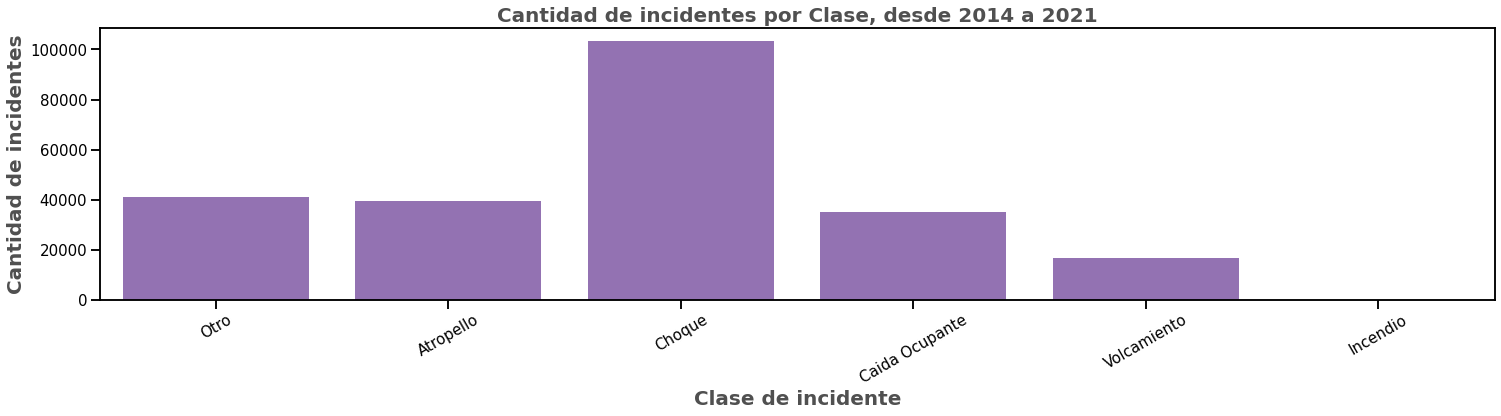

In [365]:
# Graficamente podemos verlo de la siguiente manera
fig = plt.figure(figsize=(25,5))
sns.countplot(data=invia_df, x='Clase_incidente', color='tab:purple')

plt.title('Cantidad de incidentes por Clase, desde 2014 a 2021', 
            loc='center', color='#505050', fontsize=20, fontweight='bold'
)

plt.ylabel("Cantidad de incidentes", size=20, fontweight='bold', color='#505050')
plt.xlabel("Clase de incidente", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=15)

Podemos observar en la grafica el accidente que mas se produce es el **choque**, mientras que la que menos ocurre es por **incendio**.

#### Temporalidad de Ocurrencias

**Analicemos la frecuencia de incidentes viales por dia,  mes y por año.**

###### FRECUENCIA POR DIA

In [366]:
# Analisis General
agr_df_dia = invia_df.groupby(['Dia'])['Clase_incidente'].count()[invia_df.Dia.unique()].reset_index()
agr_df_dia = agr_df_dia.rename(columns={'Clase_incidente':'Cantidad_Incidentes'})
agr_df_dia

,Dia,Cantidad_Incidentes
0,Mié,34914
1,Jue,34568
2,Vie,34856
3,Sáb,34107
4,Dom,28570
5,Lun,34078
6,Mar,34750


In [446]:
fig = px.bar(agr_df_dia, x='Dia', y='Cantidad_Incidentes',
             color='Cantidad_Incidentes',
             template='ggplot2',
             labels={'Cantidad_Incidentes':'Cantidad de Incidentes', 'Dia':'Día de la Semana'},
             title='Cantidad de Accidentes registrado por Día de la Semana, desde 2014 a 2021',
             height=400
)

fig.update_layout(
    font=dict(
        size=18,
        color='#505050',
    )
)

Por la tabla anterior y el gráfico, vemos que la ocurrencia de incidentes se distribuye de manera uniforme para cualquier dia de la semana, salvo por la suma de incidentes en el rango de años mencionado para el día Domingo. Esto  puede deberse a que no es un día hábil y a que generalmente se sale afuera más durante el día que durante la noche en este día semanal, al menos en nuestra cultura latinoamericana. 

In [368]:
# Analisis Detallado
df_mask1 = pd.crosstab(index = invia_df['Clase_incidente'],
            columns=invia_df['Dia'], margins=True)
df_mask1

Dia,Dom,Jue,Lun,Mar,Mié,Sáb,Vie,All
Clase_incidente,,,,,,,,
Atropello,5109,5625,5259,5622,5686,6311,5843,39455
Caida Ocupante,4287,5274,5429,5228,5008,4726,5146,35098
Choque,12308,14845,14820,15186,15523,15265,15436,103383
Incendio,3,5,8,2,2,1,3,24
Otro,4913,6347,6093,6195,6171,5414,6029,41162
Volcamiento,1950,2472,2469,2517,2524,2390,2399,16721
All,28570,34568,34078,34750,34914,34107,34856,235843


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



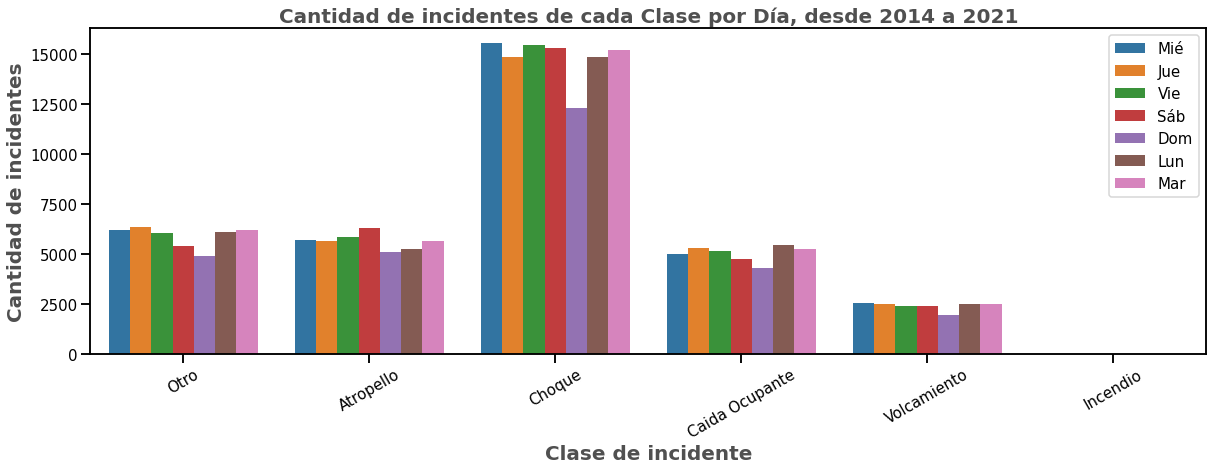

In [369]:
fig = plt.figure(figsize=(20,6))
sns.countplot(invia_df.Clase_incidente,  hue=invia_df.Dia)

plt.title('Cantidad de incidentes de cada Clase por Día, desde 2014 a 2021', 
            loc='center', color='#505050', fontsize=20, fontweight='bold'
)
plt.ylabel("Cantidad de incidentes", size=20, fontweight='bold', color='#505050')
plt.xlabel("Clase de incidente", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='upper right')

Realizando un análisis detallado considerando los tipos de incidentes, vemos que también, si bien el choque es el accidente que más se produce, la distribucion durante los dias de semana es bastante uniforme, con la particularidad del día Domingo que mencionamos anteriormente.

También podemos apreciar comparando la tabla anterior con este gráfico que, gráficamente no se logra apreciar las ocurrencias de incendios debido a que presentan una cantidad muy pequeña de casos (24 en total).

##### FRECUENCIA POR MES

In [370]:
# Analisis General
contingency_table_Mes_Año = pd.crosstab(invia_df["Mes"], invia_df["Año"])
print('Tabla de Contingencia entre Mes y Año:\n', contingency_table_Mes_Año)

Tabla de Contingencia entre Mes y Año:
 Año   2014  2015  2016  2017  2018  2019  2020  2021
Mes                                                 
Abr   2553  2634  2858  2556  2400  2234   789  1689
Ago   2789  3020  3123  2901  2560  3060  1680  2760
Dic   2579  2726  2487  2541  2434  2999  2349     0
Ene   2320  2447  2472  2474  2265  2202  2850  1951
Feb   2449  2560  2784  2754  2239  2316  2970  2441
Jul   2741  2822  2946  2682  2541  2841  1593  2785
Jun   2714  2486  2764  2546  2526  2320  1703  2553
Mar   2851  2853  2851  2679  2613  2310  2002  2401
May   2671  2830  2776  2622  2492  2429  1411  2418
Nov   2498  2605  2777  2521  2128  2900  2090     0
Oct   2516  2768  2933  2580  2426  3115  2177     0
Sept  2730  2871  3020  2802  2458  3150  2062  2729


In [371]:
agr_df_mes = invia_df.groupby(['Mes'])['Clase_incidente'].count()[invia_df.Mes.unique()].reset_index()
agr_df_mes = agr_df_mes.rename(columns={'Clase_incidente':'Cantidad_Incidentes'})
agr_df_mes

,Mes,Cantidad_Incidentes
0,Ene,18981
1,Feb,20513
2,Mar,20560
3,Abr,17713
4,May,19649
5,Jun,19612
6,Jul,20951
7,Ago,21893
8,Sept,21822
9,Oct,18515


In [447]:
fig = px.bar(agr_df_mes, x='Mes', y='Cantidad_Incidentes',
             color='Cantidad_Incidentes',
             template='ggplot2',
             labels={'Cantidad_Incidentes':'Cantidad de Incidentes', 'Mes':'Mes'},
             title='Cantidad de Accidentes registrado por Mes desde 2014 a 2021',
             height=400,
             category_orders=invia_df.Mes.unique().tolist()
)

fig.update_layout(
    font=dict(
        size=18,
        color='#505050',
    )
)

Por tabla y gráficamente, vemos que la ocurrencia de incidentes se distribuye también de manera uniforme para cualquier mes del año. Vemos que levemente sobresalen los períodos de Agosto y Septiembre, pero debemos también tener en cuenta que, el dataframe que estamos usando tiene datos hasta el mes de Septiembre para el año 2021, detalle que se puede apreciar en la tabla de contingencia anterior.

In [373]:
# Analisis Detallado
pd.crosstab(index = invia_df['Clase_incidente'],
            columns=invia_df['Mes'], margins=True,
)
            #color_palete='tab20')

Mes,Abr,Ago,Dic,Ene,Feb,Jul,Jun,Mar,May,Nov,Oct,Sept,All
Clase_incidente,,,,,,,,,,,,,
Atropello,2966,3501,3220,3212,3501,3477,3262,3502,3216,2960,3021,3617,39455
Caida Ocupante,2677,3223,2654,2854,3020,2925,2738,3332,3094,2680,2733,3168,35098
Choque,7969,9673,8008,8270,9117,9042,8585,8948,8382,7668,8101,9620,103383
Incendio,2,1,1,0,0,1,7,2,0,0,4,6,24
Otro,2822,4137,2936,3322,3442,4029,3546,3362,3400,2888,3215,4063,41162
Volcamiento,1277,1358,1296,1323,1433,1477,1474,1414,1557,1323,1441,1348,16721
All,17713,21893,18115,18981,20513,20951,19612,20560,19649,17519,18515,21822,235843


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



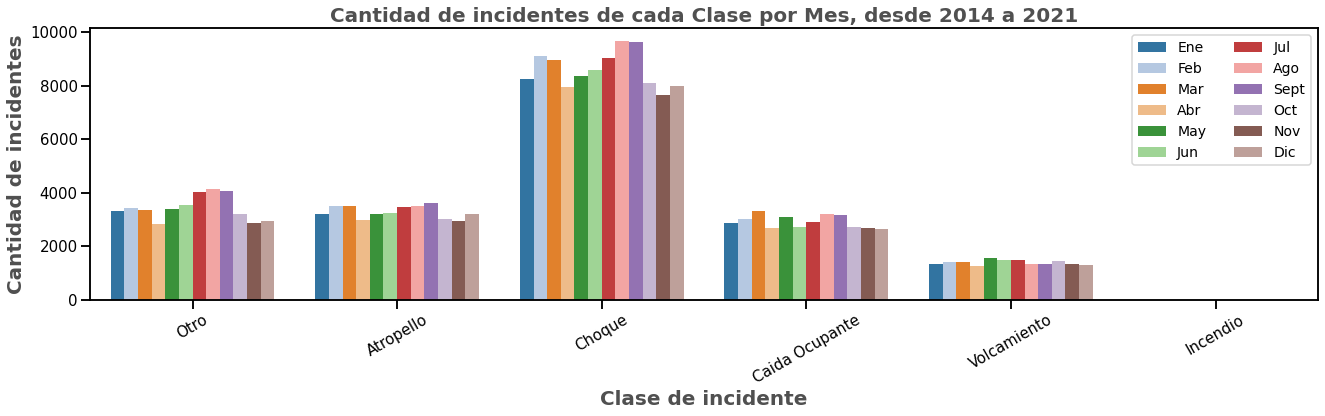

In [374]:
fig = plt.figure(figsize=(22,5))
sns.countplot(invia_df.Clase_incidente,  
              hue=invia_df.Mes, 
              palette='tab20'
)

plt.title('Cantidad de incidentes de cada Clase por Mes, desde 2014 a 2021', 
            loc='center', color='#505050', fontsize=20, fontweight='bold'
)
plt.ylabel("Cantidad de incidentes", size=20, fontweight='bold', color='#505050')
plt.xlabel("Clase de incidente", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=15)

plt.legend(fontsize=14, loc='upper right', ncol=2)

Realizando un análisis detallado visualizando por tabla y gráficamente, sucede algo similar con el análisis anterior;notamos presente una distribución casi uniforme de cantidad de incidentes para cualquier mes del año. Levemente sobresalen los períodos de Agosto y Septiembre, sin olvidar que el dataframe que estamos usando tiene datos hasta el mes de Septiembre para el año 2021.

Considerando los tipos de incidentes, vemos que también, si bien el choque es el accidente que más se produce y el incendio el de menor ocurrencia, la distribución durante los doce meses del año es prácticamente uniforme. 

##### FRECUENCIA POR AÑO

In [375]:
# Analisis General
agr_df_año = invia_df.groupby(['Año'])['Clase_incidente'].count(). reset_index()
agr_df_año = agr_df_año.rename(columns={'Clase_incidente':'Cantidad_Incidentes'})
agr_df_año

,Año,Cantidad_Incidentes
0,2014,31411
1,2015,32622
2,2016,33791
3,2017,31658
4,2018,29082
5,2019,31876
6,2020,23676
7,2021,21727


In [376]:
fig = px.bar(agr_df_año, x='Año', y='Cantidad_Incidentes',
             color='Cantidad_Incidentes',
             template='ggplot2',
             labels={'Cantidad_Incidentes':'Cantidad de Incidentes', 'Año':'Año'},
             title='Cantidad de Incidentes registrado por Año',
             height=400
)

fig.update_layout(
    font=dict(
        size=18,
        color='#505050',
    )
)

Tanto en la tabla como en el gráfico podemos notar que durante la pandemia del 2020 los casos de incidentes disminuyeron. Para el caso del 2021 denota la ausencia de los meses de Octubre, Noviembre y Diciembre como información dentro del dataframe que estamos analizando. Por esta razón, quizá el 2020 sea el año que tuvo menos casos de incidentes, ya que considera todos los meses.

In [377]:
# Analisis Detallado
pd.crosstab(index = invia_df['Clase_incidente'],
            columns=invia_df['Año'], margins=True)

Año,2014,2015,2016,2017,2018,2019,2020,2021,All
Clase_incidente,,,,,,,,,
Atropello,6191,6045,5644,4868,4711,5284,3573,3139,39455
Caida Ocupante,5449,4941,4989,4588,4814,4842,2991,2484,35098
Choque,12874,14321,14974,14189,13461,14029,10300,9235,103383
Incendio,7,1,2,2,3,7,0,2,24
Otro,5568,5355,6158,5881,4534,5535,3871,4260,41162
Volcamiento,1322,1959,2024,2130,1559,2179,2941,2607,16721
All,31411,32622,33791,31658,29082,31876,23676,21727,235843


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



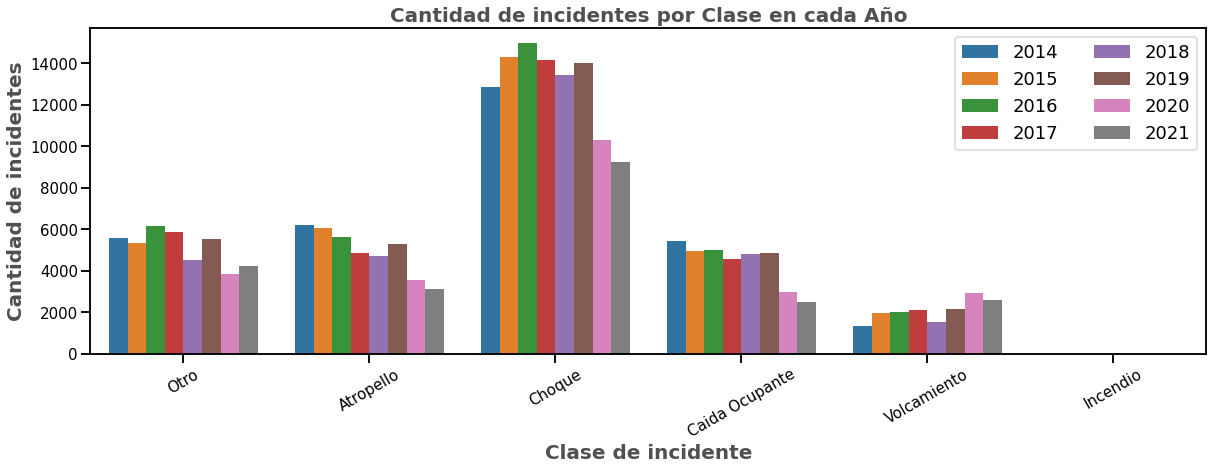

In [378]:
fig = plt.figure(figsize=(20,6))
sns.countplot(invia_df.Clase_incidente,  hue=invia_df.Año)

plt.title('Cantidad de incidentes por Clase en cada Año', 
            loc='center', color='#505050', fontsize=20, fontweight='bold'
)
plt.ylabel("Cantidad de incidentes", size=20, fontweight='bold', color='#505050')
plt.xlabel("Clase de incidente", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=15)

plt.legend(fontsize=18, loc='upper right', ncol=2)

En la tabla anterior y en este gráfico podemos apreciar que por clase de incidente, lo que mencionamos en el comentario del análisis general sigue consistente, salvo para el caso de **volcamiento**, en la que se distingue una crecimiento con el transcurrir de los años, excluyendo al año 2018 donde disminuyó. También se puede apreciar que el año donde hubo más incidentes por Choque fue en el 2016.

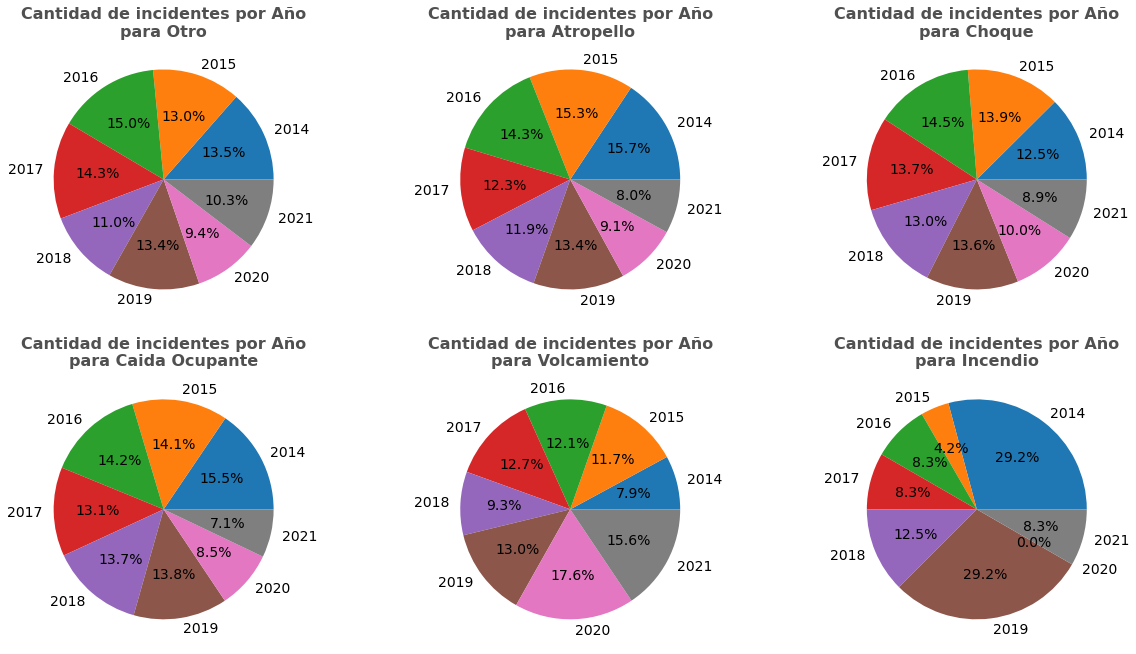

In [379]:
# ANALISIS DE FRECUENCIA DE TIPOS DE INCIDENTES POR Año CON GRAFICOS DE TORTA
colors = sns.color_palette('tab10')

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,12), sharey='row')

fig.subplots_adjust(left=1, right=2, bottom=2.3, top=3)
fig.align_ylabels(ax)
fig.align_xlabels(ax)

clase_labels = invia_df.Clase_incidente.unique().tolist()
year_labels = invia_df.Año.unique().tolist()
idx = 0
while idx + 1 < len(clase_labels):
  for i in range(2):
    for y in range(3):
        df_equal_clase = invia_df[invia_df.Clase_incidente == clase_labels[idx]]
        df_year_clases= df_equal_clase.Año.value_counts().reindex(invia_df.Año.unique(), fill_value=0)

        ax[i,y].set_title('Cantidad de incidentes por Año\npara {}'.format(clase_labels[idx]), 
                          color='#505050', fontsize=16, fontweight='bold')

        ax[i,y].pie(df_year_clases,
                    labels=year_labels, 
                    colors=colors, 
                    textprops={"fontsize":14},
                    autopct='%.1f%%'
        )

        idx = idx + 1

fig.show()

En esta gráfica además, se puede apreciar la proporción de incidentes por Año para la clase Incendio, donde hay una diferencia más marcada por año, que para las otras clases.

#### Independencia de Variables
**Revisemos qué pares de variables son independientes. ¿Podemos apreciar si hay independencia de las variables: dia y mes,  mes y año? Adicione los gráficos o tablas que considere oportuno.**


> Para realizar este análisis utilizamos la prueba de hipótesis **Chi Cuadrado de Pearson**, con las variables a estudiar ya corregidas.

La hipótesis estadística chi-cuadrado de Pearson es una prueba de independencia entre variables categóricas. El objetivo de la prueba es concluir si las dos variables (variable A y variable B) están relacionadas entre sí, o más bien, **si la variable A depende de la variable B**.

La hipótesis Nula `H_0`: La variable A es independiente de la variable B.

La hipótesis Alternativa `H_a`: La variable A es dependiente de la variable B

Criterio del **Valor de probabilidad vs Factor de Significancia**:

`P_valor <= 0.05 => Se rechaza H_0`

`p_valor > 0.05 => No se rechaza la H_0 `

Definimos un factor de significancia para determinar si la relación entre las variables tiene una significancia considerable. Generalmente se elige un `factor de significancia `o valor `alfa` de 0.05 . Este valor alfa denota la probabilidad de rechazar erróneamente H0 cuando es verdadera.

Criterio del **Estadístico chi2 vs el Valor crítico chi2**:

`Estadístico >= Valor Crítico => Se rechaza H_0`

`Estadístico < Valor Crítico =>  No se rechaza H_0`

El `estadistico chi2` es la suma de las diferencias entre cada valor observado y cada valor esperado al cuadrado, dividido por el valor esperado


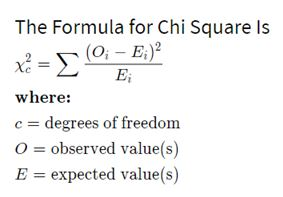

Una buena forma de analizar dos variables categóricas en forma conjunta, es agrupar los recuentos en una tabla de doble entrada; este tipo de tablas se conocen en estadística con el nombre de **tabla de contingencia**. Veamos como podemos crear esta tabla utilizando la función `crosstab` de Pandas.

##### Entre Dia y Mes

Prueba de independencia Chi^2

En nuestro estudio, con una significancia `alpha` del 0.05. 

La hipótesis Nula **H_0**: La variable Dia es independiente de la variable Mes.

La hipótesis alternativa **H_a**: La variable Dia es dependiente de la variable Mes

`P_valor <= 0.05 => Se rechaza H_0`

`p_valor > 0.05 => No se rechaza la H_0 `

In [380]:
# Determinar el Nivel de Significancia
alpha = 0.05

In [381]:
# Crear tabla de contingencia
contingency_table_Dia_Mes = pd.crosstab(invia_df["Dia"], invia_df["Mes"], margins=True)
print('Tabla de Contingencia entre Dia y Mes:\n')
contingency_table_Dia_Mes

Tabla de Contingencia entre Dia y Mes:



Mes,Abr,Ago,Dic,Ene,Feb,Jul,Jun,Mar,May,Nov,Oct,Sept,All
Dia,,,,,,,,,,,,,
Dom,2045,2638,2380,2270,2437,2435,2546,2634,2381,2208,2153,2443,28570
Jue,2610,3147,2524,2867,3147,3035,2794,2891,2901,2493,2830,3329,34568
Lun,2723,3238,2677,2501,3088,3128,2708,3095,2901,2328,2523,3168,34078
Mar,2675,3140,2729,2928,2905,3061,2956,3025,2812,2540,2867,3112,34750
Mié,2845,3154,2641,2876,2883,3141,2842,3099,2818,2672,2646,3297,34914
Sáb,2383,3204,2631,2549,3038,3102,2883,3014,2842,2652,2732,3077,34107
Vie,2432,3372,2533,2990,3015,3049,2883,2802,2994,2626,2764,3396,34856
All,17713,21893,18115,18981,20513,20951,19612,20560,19649,17519,18515,21822,235843


In [382]:
observed_values = pd.DataFrame(contingency_table_Dia_Mes.values) 
observed_values

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2045,2638,2380,2270,2437,2435,2546,2634,2381,2208,2153,2443,28570
1,2610,3147,2524,2867,3147,3035,2794,2891,2901,2493,2830,3329,34568
2,2723,3238,2677,2501,3088,3128,2708,3095,2901,2328,2523,3168,34078
3,2675,3140,2729,2928,2905,3061,2956,3025,2812,2540,2867,3112,34750
4,2845,3154,2641,2876,2883,3141,2842,3099,2818,2672,2646,3297,34914
5,2383,3204,2631,2549,3038,3102,2883,3014,2842,2652,2732,3077,34107
6,2432,3372,2533,2990,3015,3049,2883,2802,2994,2626,2764,3396,34856
7,17713,21893,18115,18981,20513,20951,19612,20560,19649,17519,18515,21822,235843


In [383]:
# Aplicamos el test de Chi Cuadrado a los datos a observar
statistic_chi2, p_value, grlib, ex_values = stats.chi2_contingency(observed_values)
# return:
# 1 - chi2float (The test statistic) 
# 2 - pfloat (The p-value of the test)
# 3 - dofint (Degrees of freedom)
# 4 - expectedndarray, same shape as observed (The expected frequencies, based on the marginal sums of the table)

In [384]:
# Datos resultantes del test
print('\nEstadistico de Chi-Cuadrado =', statistic_chi2)
print('\nP-Valor =', p_value)
print('\nGrados de Libertad =', grlib)


Estadistico de Chi-Cuadrado = 372.718943409175

P-Valor = 5.397240855580968e-38

Grados de Libertad = 84


In [385]:
expected_values = pd.DataFrame(ex_values)
expected_values

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2145.751241,2652.116069,2194.449485,2299.356648,2484.942992,2538.002273,2375.795932,2490.636568,2380.278109,2122.250099,2242.905450,2643.515135,28570.0
1,2596.231323,3208.902634,2655.153301,2782.084726,3006.633158,3070.831731,2874.571711,3013.522046,2879.994878,2567.796339,2713.782135,3198.496016,34568.0
2,2559.429850,3163.416569,2617.516611,2742.648788,2964.014255,3027.302816,2833.824773,2970.805493,2839.171067,2531.397930,2675.314383,3153.157465,34078.0
3,2609.900442,3225.797458,2669.132643,2796.732360,3022.463037,3086.999614,2889.706288,3029.388195,2895.158008,2581.315748,2728.070157,3215.336050,34750.0
4,2622.217670,3241.021366,2681.729413,2809.931327,3036.727323,3101.568476,2903.344038,3043.685163,2908.821487,2593.498073,2740.945078,3230.510585,34914.0
5,2561.607896,3166.108602,2619.744088,2744.982751,2966.536598,3029.879017,2836.236327,2973.333616,2841.587170,2533.552122,2677.591046,3155.840767,34107.0
6,2617.861577,3235.637301,2677.274458,2805.263400,3031.682636,3096.416073,2898.520931,3038.628918,2903.989281,2589.189690,2736.391752,3225.143981,34856.0
7,17713.000000,21893.000000,18115.000000,18981.000000,20513.000000,20951.000000,19612.000000,20560.000000,19649.000000,17519.000000,18515.000000,21822.000000,235843.0


In [386]:
esperados_rel = round(expected_values.apply(lambda r:r/len(invia_df)*100,axis=1),2)
esperados_rel

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.91,1.12,0.93,0.97,1.05,1.08,1.01,1.06,1.01,0.90,0.95,1.12,12.11
1,1.10,1.36,1.13,1.18,1.27,1.30,1.22,1.28,1.22,1.09,1.15,1.36,14.66
2,1.09,1.34,1.11,1.16,1.26,1.28,1.20,1.26,1.20,1.07,1.13,1.34,14.45
3,1.11,1.37,1.13,1.19,1.28,1.31,1.23,1.28,1.23,1.09,1.16,1.36,14.73
4,1.11,1.37,1.14,1.19,1.29,1.32,1.23,1.29,1.23,1.10,1.16,1.37,14.80
5,1.09,1.34,1.11,1.16,1.26,1.28,1.20,1.26,1.20,1.07,1.14,1.34,14.46
6,1.11,1.37,1.14,1.19,1.29,1.31,1.23,1.29,1.23,1.10,1.16,1.37,14.78
7,7.51,9.28,7.68,8.05,8.70,8.88,8.32,8.72,8.33,7.43,7.85,9.25,100.00


In [387]:
observados_rel = round(observed_values.apply(lambda r:r/len(invia_df)*100,axis=1),2)
observados_rel

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.87,1.12,1.01,0.96,1.03,1.03,1.08,1.12,1.01,0.94,0.91,1.04,12.11
1,1.11,1.33,1.07,1.22,1.33,1.29,1.18,1.23,1.23,1.06,1.20,1.41,14.66
2,1.15,1.37,1.14,1.06,1.31,1.33,1.15,1.31,1.23,0.99,1.07,1.34,14.45
3,1.13,1.33,1.16,1.24,1.23,1.30,1.25,1.28,1.19,1.08,1.22,1.32,14.73
4,1.21,1.34,1.12,1.22,1.22,1.33,1.21,1.31,1.19,1.13,1.12,1.40,14.80
5,1.01,1.36,1.12,1.08,1.29,1.32,1.22,1.28,1.21,1.12,1.16,1.30,14.46
6,1.03,1.43,1.07,1.27,1.28,1.29,1.22,1.19,1.27,1.11,1.17,1.44,14.78
7,7.51,9.28,7.68,8.05,8.70,8.88,8.32,8.72,8.33,7.43,7.85,9.25,100.00


In [388]:
var1 = 'Dia'
var2 = 'Mes'
print('\nAnalizando por el P-Valor y el Nivel de Significancia propuesto podemos:\n')    
if p_value <= alpha:
    print('Rechazar H_0, por tanto, la variable categórica {} depende de la variable categórica {}.'\
          .format(var1, var2))
else:
    print('Aceptar H_0, por tanto, la variable categórica {} es independiente de la variable categórica {}.'\
          .format(var1, var2))


Analizando por el P-Valor y el Nivel de Significancia propuesto podemos:

Rechazar H_0, por tanto, la variable categórica Dia depende de la variable categórica Mes.


Como el `p_value` obtenido 5.397240855580968e-38 `<` 0.0000..539.. `<` 0.05, por lo tanto, se rechaza la hipotesis nula H_0 de independencia. **Esto significa que la variable Dia es dependiente de la variable Mes**.

De forma adicional, desarrollaremos el test de hipótesis de Chi Cuadrado paso a paso, utilizando el criterio

 **Estadístico chi2 vs el Valor crítico chi2**

In [389]:
# Determinar la dimensión de la tabla
dim = contingency_table_Dia_Mes.shape
dim

(8, 13)

In [390]:
# Determinar el número de columnas y de filas de la tabla calculada
n_rows = dim[0]
m_columns = dim[1]
print("Nro de filas = %s" % n_rows)
print("Nro de columnas = %s" % m_columns)

Nro de filas = 8
Nro de columnas = 13


In [391]:
# Calcular los grados de libertad con los datos obtenidos de la tabla de contingencia
grado_lib = (n_rows - 1) * (m_columns - 1)
grado_lib

84

In [392]:
# Pasar a un arreglo la tabla de valores observados
observed_array = observed_values.to_numpy().flatten()

In [393]:
# Pasar a un arreglo la tabla de valores esperados
expected_array = expected_values.to_numpy().flatten()

In [394]:
# Calcular el valor de Chi Cuadrado
chi_square_statistic = sum([((o - e)**2)/e for o,e in zip(observed_array, expected_array)])
chi_square_statistic

372.718943409175

In [395]:
# Determinar el valor critico para comparar
critical_value = stats.chi2.ppf(q=1-alpha, df=grado_lib)
critical_value

106.39484024272251

In [396]:
var1 = 'Dia'
var2 = 'Mes'
print('Analizando los valores calculados de Chi-Cuadrado y el Valor Critico podemos:\n')
if chi_square_statistic >= critical_value:
    print('Rechazar H_0, por tanto, la variable categórica {} depende de la variable categórica {}.'\
          .format(var1, var2))
else:
    print('Aceptar H_0, por tanto, la variable categórica {} es independiente de la variable categórica {}.'\
          .format(var1, var2))

Analizando los valores calculados de Chi-Cuadrado y el Valor Critico podemos:

Rechazar H_0, por tanto, la variable categórica Dia depende de la variable categórica Mes.


El Estadístico >= Valor Crítico. Entonces, Se rechaza la hipótesis H_0 de independencia. 

**Esto significa que la variable Dia es dependiente de la variable Mes**.

> **Conclusión**: Realizando la prueba de Chi Cuadrado tenemos como resultado que las variables categóricas de `Dia` y `Mes` son **dependientes**.

##### Entre Mes y Año

Prueba de independencia Chi^2

En nuestro estudio, con una significancia `alpha` del 0.05. 

La hipótesis Nula **H_0**: La variable Mes es independiente de la variable Año.

La hipótesis alternativa **H_a**: La variable Mes es dependiente de la variable Año

`P_valor <= 0.05 => Se rechaza H_0`

`p_valor > 0.05 => No se rechaza la H_0 `

In [397]:
# Determinar el Nivel de Significancia
alpha = 0.05

In [398]:
# Crear tabla de contingencia
contingency_table_Mes_Año = pd.crosstab(invia_df["Mes"], invia_df["Año"], margins=True)
print('Tabla de Contingencia entre Mes y Año:\n')
contingency_table_Mes_Año

Tabla de Contingencia entre Mes y Año:



Año,2014,2015,2016,2017,2018,2019,2020,2021,All
Mes,,,,,,,,,
Abr,2553,2634,2858,2556,2400,2234,789,1689,17713
Ago,2789,3020,3123,2901,2560,3060,1680,2760,21893
Dic,2579,2726,2487,2541,2434,2999,2349,0,18115
Ene,2320,2447,2472,2474,2265,2202,2850,1951,18981
Feb,2449,2560,2784,2754,2239,2316,2970,2441,20513
Jul,2741,2822,2946,2682,2541,2841,1593,2785,20951
Jun,2714,2486,2764,2546,2526,2320,1703,2553,19612
Mar,2851,2853,2851,2679,2613,2310,2002,2401,20560
May,2671,2830,2776,2622,2492,2429,1411,2418,19649


In [399]:
observed_values_Mes_Año = pd.DataFrame(contingency_table_Mes_Año.values) 
observed_values_Mes_Año

,0,1,2,3,4,5,6,7,8
0,2553,2634,2858,2556,2400,2234,789,1689,17713
1,2789,3020,3123,2901,2560,3060,1680,2760,21893
2,2579,2726,2487,2541,2434,2999,2349,0,18115
3,2320,2447,2472,2474,2265,2202,2850,1951,18981
4,2449,2560,2784,2754,2239,2316,2970,2441,20513
5,2741,2822,2946,2682,2541,2841,1593,2785,20951
6,2714,2486,2764,2546,2526,2320,1703,2553,19612
7,2851,2853,2851,2679,2613,2310,2002,2401,20560
8,2671,2830,2776,2622,2492,2429,1411,2418,19649
9,2498,2605,2777,2521,2128,2900,2090,0,17519


In [400]:
# Aplicamos el test de Chi Cuadrado a los datos a observar
statistic_chi2_Mes_Año, p_value_Mes_Año, grlib_Mes_Año, ex_values_Mes_Año = stats.chi2_contingency(observed_values_Mes_Año)

In [401]:
# Datos resultantes del test
print('\nEstadistico de Chi-Cuadrado =', statistic_chi2_Mes_Año)
print('\nP-Valor =', p_value_Mes_Año)
print('\nGrados de Libertad =', grlib_Mes_Año)


Estadistico de Chi-Cuadrado = 10130.35499544334

P-Valor = 0.0

Grados de Libertad = 96


In [402]:
expected_values_Mes_Año = pd.DataFrame(ex_values_Mes_Año)
expected_values_Mes_Año

,0,1,2,3,4,5,6,7,8
0,2359.124685,2450.076899,2537.874701,2377.675632,2184.205026,2394.048532,1778.187133,1631.807393,17713.0
1,2915.842416,3028.257977,3136.774731,2938.771106,2699.644365,2959.007764,2197.812392,2016.889248,21893.0
2,2412.665481,2505.681873,2595.472263,2431.637445,2233.775987,2448.381932,1818.543438,1668.841581,18115.0
3,2528.004609,2625.467714,2719.550595,2547.883541,2340.563180,2565.428510,1905.480154,1748.621697,18981.0
4,2732.045653,2837.375228,2939.051755,2753.529060,2529.475397,2772.490123,2059.275823,1889.756961,20513.0
5,2790.381148,2897.959753,3001.807308,2812.323274,2583.485548,2831.689200,2103.246126,1930.107644,20951.0
6,2612.045013,2712.748159,2809.958710,2632.584796,2418.372324,2650.713025,1968.825498,1806.752475,19612.0
7,2738.305398,2843.876308,2945.785798,2759.838028,2535.271007,2778.842535,2063.994098,1894.086829,20560.0
8,2616.972897,2717.866030,2815.259978,2637.551430,2422.934825,2655.713860,1972.539885,1810.161094,19649.0
9,2333.286589,2423.242657,2510.078862,2351.634358,2160.282722,2367.827936,1758.711702,1613.935173,17519.0


In [403]:
var1 = 'Mes'
var2 = 'Año'
print('\nAnalizando por el P-Valor y el Nivel de Significancia propuesto podemos:\n')    
if p_value_Mes_Año <= alpha:
    print('Rechazar H_0, por tanto, la variable categórica {} depende de la variable categórica {}.'\
          .format(var1, var2))
else:
    print('Aceptar H_0, por tanto, la variable categórica {} es independiente de la variable categórica {}.'\
          .format(var1, var2))


Analizando por el P-Valor y el Nivel de Significancia propuesto podemos:

Rechazar H_0, por tanto, la variable categórica Mes depende de la variable categórica Año.


Como el `p_value` obtenido 0.0 `<` 0.05, por lo tanto, se rechaza la hipotesis nula H_0 de independencia. **Esto significa que la variable Dia es dependiente de la variable Mes**.

De forma adicional, desarrollaremos el test de hipótesis de Chi Cuadrado paso a paso, utilizando el criterio

 **Estadístico chi2 vs el Valor crítico chi2**

In [404]:
# Determinar la dimensión de la tabla
dim_Mes_Año = contingency_table_Mes_Año.shape
dim_Mes_Año

(13, 9)

In [405]:
# Determinar el número de columnas y de filas de la tabla calculada
n_rows_Mes_Año = dim_Mes_Año [0]
m_columns_Mes_Año = dim_Mes_Año [1]
print("Nro de filas = %s" % n_rows_Mes_Año)
print("Nro de columnas = %s" % m_columns_Mes_Año)

Nro de filas = 13
Nro de columnas = 9


In [406]:
# Calcular los grados de libertad con los datos obtenidos de la tabla de contingencia
grado_lib_Mes_Año = (n_rows_Mes_Año - 1) * (m_columns_Mes_Año - 1)
grado_lib_Mes_Año

96

In [407]:
# Pasar a un arreglo la tabla de valores observados
observed_array_Mes_Año = observed_values_Mes_Año.to_numpy().flatten()

In [408]:
# Pasar a un arreglo la tabla de valores esperados
expected_array_Mes_Año = expected_values_Mes_Año.to_numpy().flatten()

In [409]:
# Calcular el valor de Chi Cuadrado
chi_square_statistic_Mes_Año = sum([((o - e)**2)/e for o,e in zip(observed_array_Mes_Año, expected_array_Mes_Año)])
chi_square_statistic_Mes_Año

10130.354995443338

In [410]:
# Determinar el valor critico para comparar
critical_value_Mes_Año = stats.chi2.ppf(q=1-alpha, df=grado_lib_Mes_Año)
critical_value_Mes_Año

119.87093929856714

In [411]:
var1 = 'Mes'
var2 = 'Año'
print('Analizando los valores calculados de Chi-Cuadrado y el Valor Critico podemos:\n')
if chi_square_statistic_Mes_Año >= critical_value_Mes_Año:
    print('Rechazar H_0, por tanto, la variable categórica {} depende de la variable categórica {}.'\
          .format(var1, var2))
else:
    print('Aceptar H_0, por tanto, la variable categórica {} es independiente de la variable categórica {}.'\
          .format(var1, var2))

Analizando los valores calculados de Chi-Cuadrado y el Valor Critico podemos:

Rechazar H_0, por tanto, la variable categórica Mes depende de la variable categórica Año.


El Estadístico >= Valor Crítico. Entonces, se rechaza la hipótesis H_0 de independencia. 

**Esto significa que la variable Dia es dependiente de la variable Mes**.

> **Conclusión**: Realizando la prueba de Chi Cuadrado tenemos como resultado que las variables categóricas de `Mes` y `Año` son **dependientes**.

#### Relación entre Variables

**Analicemos si existe un relación entre las variables Sexo y Clase_incidente.**

Prueba de independencia Chi^2

En nuestro estudio, con una significancia `alpha` del 0.05. 

La hipótesis Nula **H_0**: La variable Sexo es independiente de la variable Clase_incidente.

La hipótesis alternativa **H_a**: La variable Sexo es dependiente de la variable Clase_incidente

`P_valor <= 0.05 => Se rechaza H_0`

`p_valor > 0.05 => No se rechaza la H_0 `

In [412]:
# Determinar el Nivel de Significancia
alpha = 0.05

In [413]:
# Crear tabla de contingencia
contingency_table_Sex_Clase = pd.crosstab(invia_df["Sexo"], invia_df["Clase_incidente"], margins=True)
print('Tabla de Contingencia entre Sexo y Clase_incidente:\n')
contingency_table_Sex_Clase

Tabla de Contingencia entre Sexo y Clase_incidente:



Clase_incidente,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento,All
Sexo,,,,,,,
F,13394,12697,28532,6,12013,5121,71763
M,25763,22121,73719,18,28688,11294,161603
Sin Inf,298,280,1132,0,461,306,2477
All,39455,35098,103383,24,41162,16721,235843


In [414]:
observed_values_Sex_Clase = pd.DataFrame(contingency_table_Sex_Clase.values) 
observed_values_Sex_Clase

,0,1,2,3,4,5,6
0,13394,12697,28532,6,12013,5121,71763
1,25763,22121,73719,18,28688,11294,161603
2,298,280,1132,0,461,306,2477
3,39455,35098,103383,24,41162,16721,235843


In [415]:
# Aplicamos el test de Chi Cuadrado a los datos a observar
statistic_chi2_Sex_Clase, p_value_Sex_Clase, grlib_Sex_Clase, ex_values_Sex_Clase = stats.chi2_contingency(observed_values_Sex_Clase)

In [416]:
# Datos resultantes del test
print('\nEstadistico de Chi-Cuadrado =', statistic_chi2_Sex_Clase)
print('\nP-Valor =', p_value_Sex_Clase)
print('\nGrados de Libertad =', grlib_Sex_Clase)


Estadistico de Chi-Cuadrado = 1332.3488649071671

P-Valor = 4.704810320182912e-272

Grados de Libertad = 18


In [417]:
expected_values_Sex_Clase = pd.DataFrame(ex_values_Sex_Clase)
expected_values_Sex_Clase

,0,1,2,3,4,5,6
0,12005.48316,10679.722417,31457.682564,7.302790,12524.894129,5087.914939,71763.0
1,27035.13085,24049.652074,70839.511662,16.445144,28204.791688,11457.468583,161603.0
2,414.38599,368.625509,1085.805773,0.252066,432.314184,175.616478,2477.0
3,39455.00000,35098.000000,103383.000000,24.000000,41162.000000,16721.000000,235843.0


In [418]:
var1 = 'Sexo'
var2 = 'Clase_incidente'
print('\nAnalizando por el P-Valor y el Nivel de Significancia propuesto podemos:\n')    
if p_value_Sex_Clase <= alpha:
    print('Rechazar H_0, por tanto, la variable categórica {} depende de la variable categórica {}.'\
          .format(var1, var2))
else:
    print('Aceptar H_0, por tanto, la variable categórica {} es independiente de la variable categórica {}.'\
          .format(var1, var2))


Analizando por el P-Valor y el Nivel de Significancia propuesto podemos:

Rechazar H_0, por tanto, la variable categórica Sexo depende de la variable categórica Clase_incidente.


Como el `p_value` obtenido 4.704810320182912e-272 `<` 0.0000..470.. `<` 0.05, por lo tanto, se rechaza la hipotesis nula H_0 de independencia. **Esto significa que la variable Sexo es dependiente de la variable Clase_incidente**.

De forma adicional, desarrollaremos el test de hipótesis de Chi Cuadrado paso a paso, utilizando el criterio

 **Estadístico chi2 vs el Valor crítico chi2**

In [419]:
# Determinar la dimensión de la tabla
dim_Sex_Clase = contingency_table_Sex_Clase.shape
dim_Sex_Clase

(4, 7)

In [420]:
# Determinar el número de columnas y de filas de la tabla calculada
n_rows_Sex_Clase = dim_Sex_Clase[0]
m_columns_Sex_Clase = dim_Sex_Clase[1]
print("Nro de filas = %s" % n_rows_Sex_Clase)
print("Nro de columnas = %s" % m_columns_Sex_Clase)

Nro de filas = 4
Nro de columnas = 7


In [421]:
# Calcular los grados de libertad con los datos obtenidos de la tabla de contingencia
grado_lib_Sex_Clase = (n_rows_Sex_Clase - 1) * (m_columns_Sex_Clase - 1)
grado_lib_Sex_Clase

18

In [422]:
# Pasar a un arreglo la tabla de valores observados
observed_array_Sex_Clase = observed_values_Sex_Clase.to_numpy().flatten()

In [423]:
# Pasar a un arreglo la tabla de valores esperados
expected_array_Sex_Clase = expected_values_Sex_Clase.to_numpy().flatten()

In [424]:
# Calcular el valor de Chi Cuadrado
chi_square_statistic_Sex_Clase = sum([((o - e)**2)/e for o,e in zip(observed_array_Sex_Clase, expected_array_Sex_Clase)])
chi_square_statistic_Sex_Clase

1332.3488649071676

In [425]:
# Determinar el valor critico para comparar
critical_value_Sex_Clase = stats.chi2.ppf(q=1-alpha, df=grado_lib_Sex_Clase)
critical_value_Sex_Clase

28.869299430392623

In [426]:
var1 = 'Sexo'
var2 = 'Clase_incidente'
print('Analizando los valores calculados de Chi-Cuadrado y el Valor Critico podemos:\n')
if chi_square_statistic_Sex_Clase >= critical_value_Sex_Clase:
    print('Rechazar H_0, por tanto, la variable categórica {} depende de la variable categórica {}.'\
          .format(var1, var2))
else:
    print('Aceptar H_0, por tanto, la variable categórica {} es independiente de la variable categórica {}.'\
          .format(var1, var2))

Analizando los valores calculados de Chi-Cuadrado y el Valor Critico podemos:

Rechazar H_0, por tanto, la variable categórica Sexo depende de la variable categórica Clase_incidente.


El Estadístico >= Valor Crítico. Entonces, se rechaza la hipótesis H_0 de independencia. 

**Esto significa que la variable Sexo es dependiente de la variable Clase_incidente**.

> **Conclusión**: Realizando la prueba de Chi Cuadrado tenemos como resultado que las variables categóricas de `Sexo` y `Clase_incidente` son **dependientes**.

---

##### Analisis Gráfico de Variables

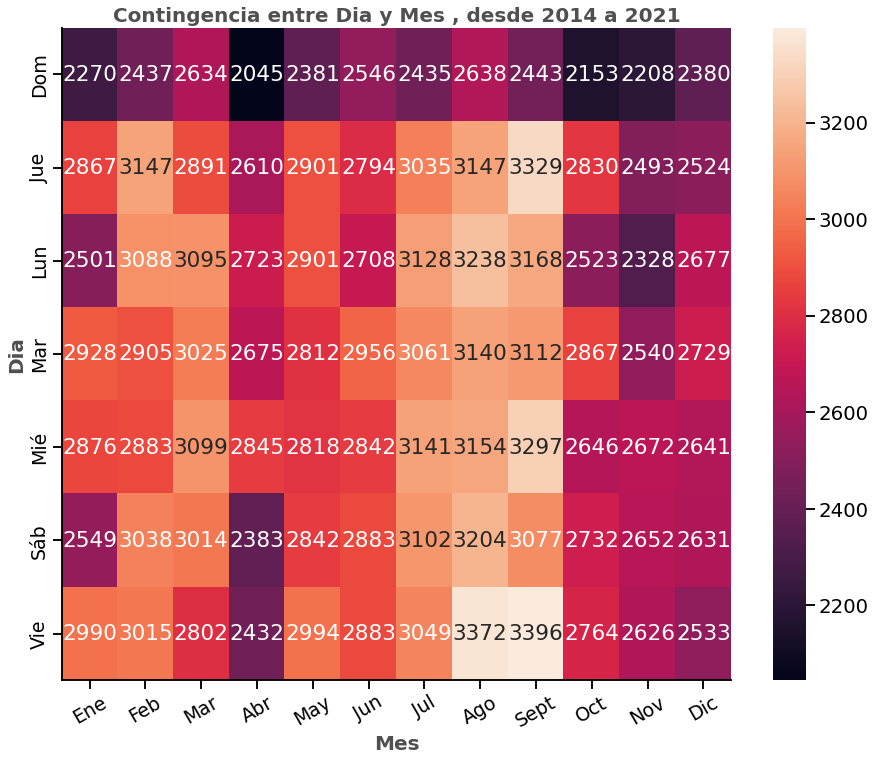

In [427]:
# ANALISIS DE CORRELACION DE Dia Y Mes
fig = plt.figure(figsize=(15,12))
exp = pd.crosstab(invia_df.Dia, invia_df.Mes)[invia_df.Mes.unique()]

sns.heatmap(exp, annot=True, fmt='g')

plt.title('Contingencia entre Dia y Mes , desde 2014 a 2021', 
            loc='center', color='#505050', fontsize=20, fontweight='bold'
)

plt.ylabel("Dia", size=20, fontweight='bold', color='#505050')
plt.xlabel("Mes", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=19, rotation=30)
plt.yticks(fontsize=19)

sns.despine()

Mediante este gráfico podemos notar que la mayor cantidad de casos ocurrió en el mes de Septiembre el día Viernes seguido del Jueves, y durante Agosto, el día Viernes. Por lo que, podemos notar que existe una relación entre la variable Dia y Mes para la ocurrencia de casos, es decir, son dependientes.

En este mapa de calor se puede apreciar además que el número de incidentes aumentan en los meses de Julio,  Agosto y Septiembre. En información de dominio que obtuvimos, cabe aclarar que hay una conexión con la Feria de las flores que se celebra en el mes de Agosto, y algunos empiezan a celebrar desde Julio; en el mes de Septiembre se celebra el mes del amor y la amistad en colombia.

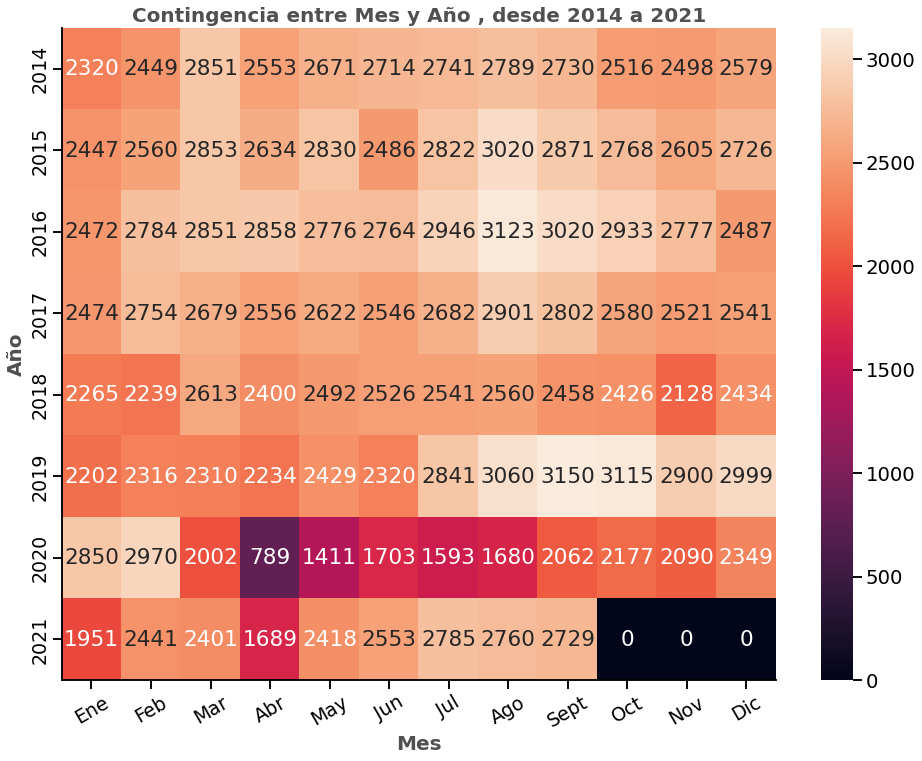

In [428]:
# ANALISIS DE CORRELACION DE Mes Y Año
fig = plt.figure(figsize=(16,12))
exp = pd.crosstab(invia_df.Año, invia_df.Mes)[invia_df.Mes.unique()]

sns.heatmap(exp, annot=True, fmt='g')

plt.title('Contingencia entre Mes y Año , desde 2014 a 2021', 
            loc='center', color='#505050', fontsize=20, fontweight='bold'
)

plt.ylabel("Año", size=20, fontweight='bold', color='#505050')
plt.xlabel("Mes", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=19, rotation=30)
plt.yticks(fontsize=19)

sns.despine()

En este caso, con este mapa de calor, se puede apreciar que la mayor ocurrencia de casos es durante el mes de Septiembre de 2019, seguido de Agosto de 2016. Por lo que, podemos notar que existe una relación entre la variable Mes y Año para la ocurrencia de casos, es decir, son dependientes.

In [429]:
 # ANALISIS DE FRECUENCIA DE INCIDENTES POR SEXO
cant_df_sexo = invia_df.groupby(['Sexo'])['Clase_incidente'].count(). reset_index()
cant_df_sexo = cant_df_sexo.rename(columns={'Clase_incidente':'Cantidad_Incidentes'})
cant_df_sexo

,Sexo,Cantidad_Incidentes
0,F,71763
1,M,161603
2,Sin Inf,2477


(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000.]), <a list of 8 Text major ticklabel objects>)

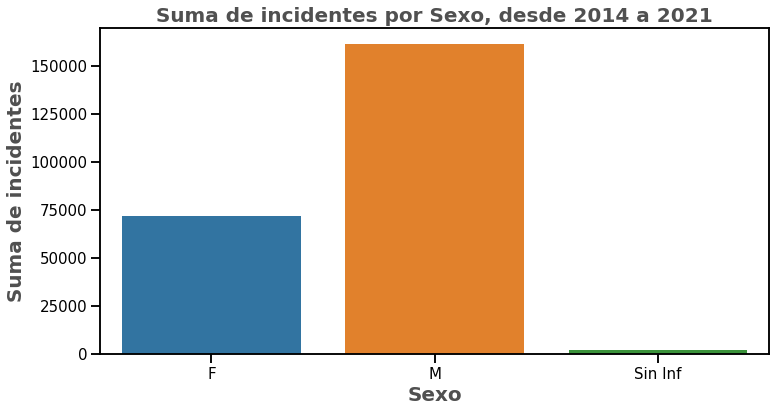

In [430]:
fig = plt.figure(figsize=(12,6))
sns.barplot(data=cant_df_sexo,
                y='Cantidad_Incidentes', x='Sexo',
                ci=None)

plt.title('Suma de incidentes por Sexo, desde 2014 a 2021', 
            loc='center', color='#505050', fontsize=20, fontweight='bold'
)

plt.ylabel("Suma de incidentes", size=20, fontweight='bold', color='#505050')
plt.xlabel("Sexo", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [431]:
# ANALISIS DE FRECUENCIA DE TIPOS DE INCIDENTES POR SEXO EN TABLA
agr_df_sexo = pd.crosstab(index = invia_df['Clase_incidente'],
            columns=invia_df['Sexo'])#, margins=True) Agrega una columna y fila con totales
agr_df_sexo

Sexo,F,M,Sin Inf
Clase_incidente,,,
Atropello,13394,25763,298
Caida Ocupante,12697,22121,280
Choque,28532,73719,1132
Incendio,6,18,0
Otro,12013,28688,461
Volcamiento,5121,11294,306


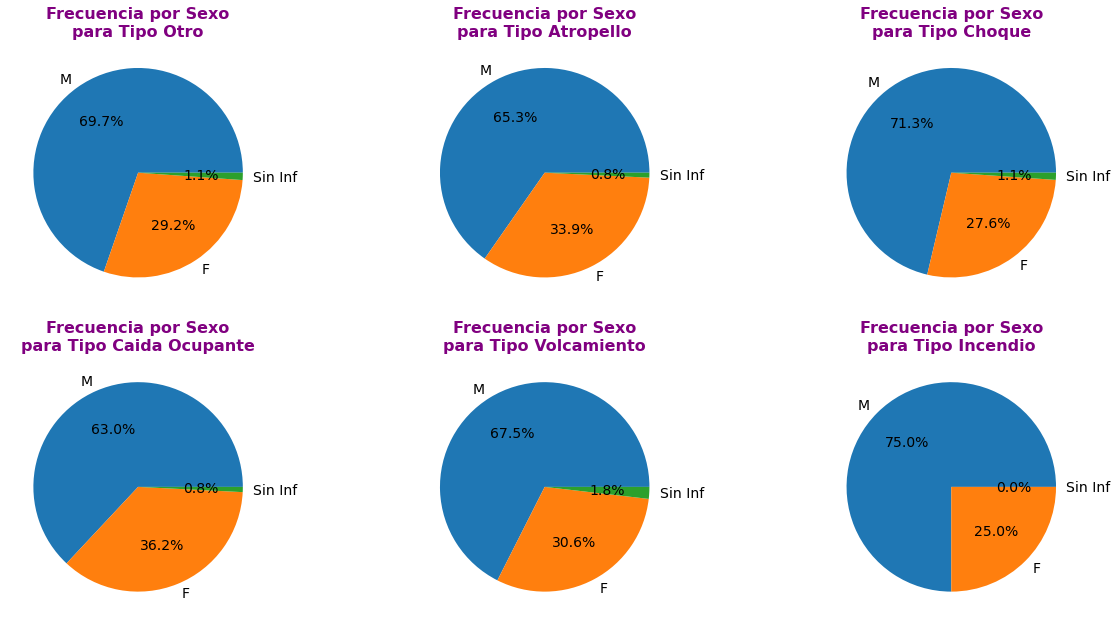

In [432]:
# ANALISIS DE FRECUENCIA DE TIPOS DE INCIDENTES POR SEXO CON GRAFICOS DE TORTA
colors = sns.color_palette('tab10')

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8), sharey='row')

fig.subplots_adjust(left=1, right=2, bottom=2.3, top=3.3)
fig.align_ylabels(ax)
fig.align_xlabels(ax)

clase_labels = invia_df.Clase_incidente.unique().tolist()
sexs_labels = invia_df.Sexo.unique().tolist()
idx = 0
while idx + 1< len(clase_labels):
  for i in range(2):
    for y in range(3):
        df_equal_clase = invia_df[invia_df['Clase_incidente'] == clase_labels[idx]]
        df_conditions_case = df_equal_clase['Sexo'].value_counts().reindex(invia_df.Sexo.unique(), fill_value=0)

        ax[i,y].set_title('Frecuencia por Sexo\npara Tipo {}'.format(clase_labels[idx]), 
                          color='purple', fontsize=16, fontweight='bold')

        ax[i,y].pie(df_conditions_case,
                    explode=None, 
                    labels=sexs_labels, 
                    colors=colors, 
                    textprops={"fontsize":14},
                    autopct='%.1f%%'
        )
        idx = idx + 1

fig.show()

Se puede apreciar cierta diferencia, si bien no muy marcada, en la proporción para el sexo femenino, masculino, y Sin Inf. Por lo tanto, se puede pensar que existe una relación entre la variable Sexo y Clase_incidente para la ocurrencia de casos, es decir, son dependientes.

### Seccion 3 --> Preguntas Disparadoras

**¿Como se distribuyen los incidentes viales por comuna y por barrio?**

Como la poblacion general de Comunas son aproximadamente 20, para visualizar podemos considerar esta totalidad de Comunas, ya que no es demasiada.

In [433]:
# Como las comunas son 22 podemos hacer un analisis general de toda la poblacion
agr_df_comuna = pd.crosstab(index = invia_df['Comuna'],
                columns=invia_df['Clase_incidente'])
agr_df_comuna

Clase_incidente,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento
Comuna,,,,,,
01 - Popular,1520,747,1045,1,770,365
02 - Santa Cruz,1191,544,1157,0,585,273
03 - Manrique,2390,1419,3342,1,1545,724
04 - Aranjuez,2852,2052,6398,2,2326,904
05 - Castilla,2850,3551,10761,0,4173,1548
06 - Doce de Octubre,1921,1787,2504,0,1499,478
07 - Robledo,2158,3291,6696,0,3445,1103
08 - Villa Hermosa,1647,1248,2892,1,1295,630
09 - Buenos Aires,1514,1351,3921,0,1837,809


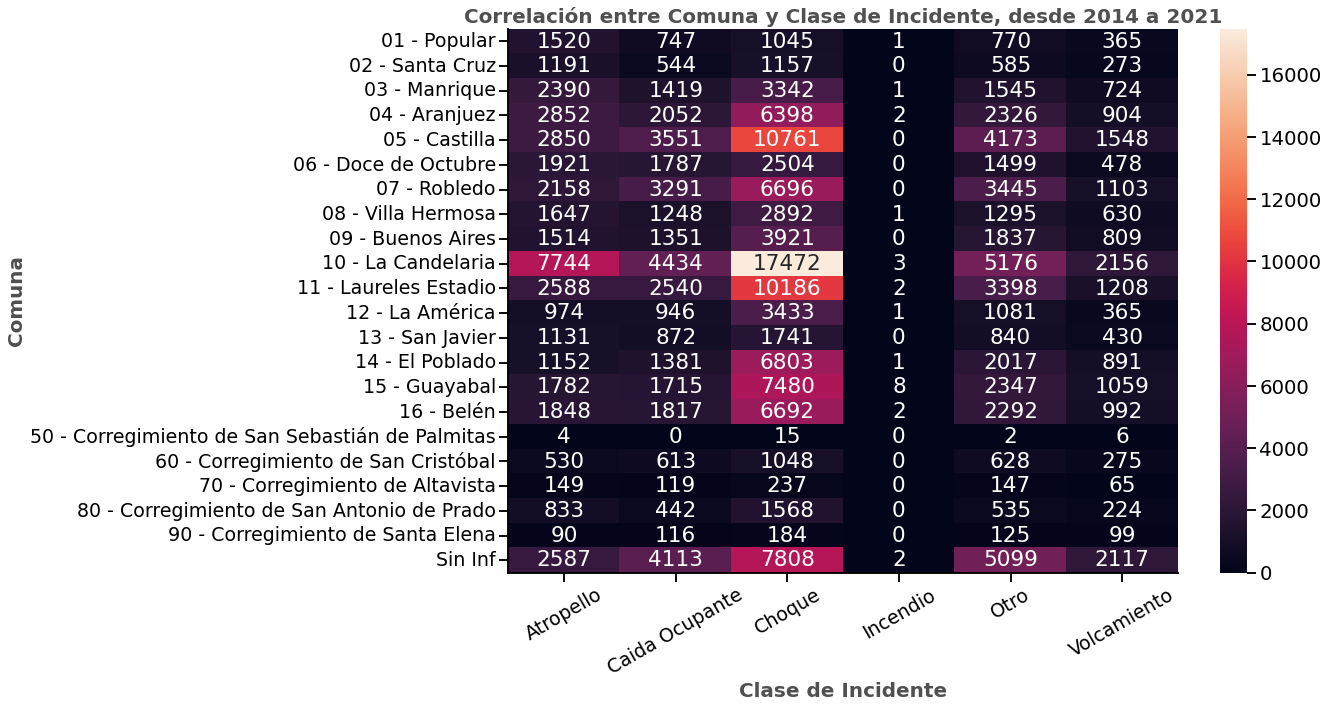

In [434]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(agr_df_comuna, annot=True, fmt='g')

plt.title('Correlación entre Comuna y Clase de Incidente, desde 2014 a 2021', 
            loc='center', color='#505050', fontsize=20, fontweight='bold'
)

plt.ylabel("Comuna", size=20, fontweight='bold', color='#505050')
plt.xlabel("Clase de Incidente", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=19, rotation=30)
plt.yticks(fontsize=19)

sns.despine()

De acuerdo a nuestro análisis, podríamos determinar que en la comuna de la Candelaria se producen la mayor cantidad de Choques; después le siguen la comuna de Castilla y la de Laureles Estadio.

Como la poblacion general de Barrios son aproximadamente 450, la visualización no puede considerar la totalidad de Barrios, por lo tanto, optamos por tomar un valor determinado de los mismos considerando a aquellos que tuvieron mayor cantidad de Incidentes. Se eliminaron datos considerados nulos que podian afectar el análisis.

In [435]:
# Definir cantidad de barrios a considerar de acuerdo a los que tienen mayor frecuencia de Incidentes
top = 20
# Armar un dataframe con los Barrios ordenados de mayor a menor por la cantidad de Incidentes 
select_barrios_df = invia_df.Barrio.value_counts().reset_index()\
    .rename(columns={'index': 'Barrios', 'Barrio': 'Frecuencia'})
# Seleccionar los primeros top Barrios
select_barrios_df = select_barrios_df[:top]
select_barrios_df

,Barrios,Frecuencia
0,Sin Inf,21264
1,Caribe,3917
2,La Candelaria,3799
3,Perpetuo Socorro,3759
4,Campo Amor,3608
5,Cabecera San Antonio de Prado,3318
6,Santa Fé,3289
7,Castilla,3185
8,Barrio Colón,2830
9,Los Conquistadores,2800


Vemos que el valor de 'Sin Inf' es muy alto y distorsiona los datos. Lo eliminaremos.

In [436]:
# Armar lista con los Barrios a considerar
lista_barrios = select_barrios_df['Barrios'].tolist()
# Eliminar el valor 'Sin Inf'
posicion=0
while posicion<len(lista_barrios):
    if lista_barrios[posicion]=='Sin Inf':
        lista_barrios.pop(posicion)
    else:
        posicion=posicion+1
lista_barrios

['Caribe',
 'La Candelaria',
 'Perpetuo Socorro',
 'Campo Amor',
 'Cabecera San Antonio de Prado',
 'Santa Fé',
 'Castilla',
 'Barrio Colón',
 'Los Conquistadores',
 'Villa Nueva',
 'San Benito',
 'Los Colores',
 'Terminal de Transporte',
 'Carlos E. Restrepo',
 'Prado',
 'Naranjal',
 'Boston',
 'Guayaquil',
 'San Diego']

In [437]:
# Armar un dataframe igual al original corregido pero con los barrios de la lista resultante
imp_barrio_df = invia_df[invia_df.Barrio.isin(lista_barrios)].reset_index()

imp_barrio_df

,index,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
0,17,Heridos,2014-01-01,04:20:00,Choque,CR 50 CL 4,M,32.0,Motociclista,Ene,Mié,1.0,4.0,30 - 39,2014,1424110.0,6.209160,-75.579329,15 - Guayabal,Campo Amor
1,18,Heridos,2014-01-01,04:20:00,Choque,CR 50 CL 4,F,33.0,Acompañante de Motocicleta,Ene,Mié,1.0,4.0,30 - 39,2014,1424110.0,6.209160,-75.579329,15 - Guayabal,Campo Amor
2,23,Heridos,2014-01-01,05:55:00,Otro,CR 65 CL 80,M,35.0,Motociclista,Ene,Mié,1.0,5.0,30 - 39,2014,1423904.0,6.276299,-75.573364,05 - Castilla,Terminal de Transporte
3,28,Heridos,2014-01-01,08:00:00,Otro,CL 52 CR 46,M,25.0,Motociclista,Ene,Mié,1.0,8.0,20 - 29,2014,1424096.0,6.249282,-75.564683,10 - La Candelaria,La Candelaria
4,59,Heridos,2014-01-01,19:30:00,Otro,CR 57 CL 48,M,5.0,Pasajero,Ene,Mié,1.0,19.0,0 - 9,2014,1423928.0,6.250175,-75.575037,10 - La Candelaria,Guayaquil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54032,235818,Heridos,2021-09-30,16:40:00,Atropello,CR 49 DG 50,F,39.0,Peatón,Sept,Jue,30.0,16.0,30 - 39,2021,1764132.0,-75.566743,6.249017,10 - La Candelaria,La Candelaria
54033,235825,Heridos,2021-09-30,17:40:00,Atropello,CL 44 CR 52,M,46.0,Peatón,Sept,Jue,30.0,17.0,40 - 49,2021,1764120.0,-75.572551,6.245209,10 - La Candelaria,Guayaquil
54034,235829,Heridos,2021-09-30,18:20:00,Atropello,CL 52 CR 38,F,49.0,Peatón,Sept,Jue,30.0,18.0,40 - 49,2021,1763786.0,-75.557867,6.247005,10 - La Candelaria,Boston
54035,235833,Heridos,2021-09-30,19:00:00,Choque,CR 51 CL 49,M,31.0,Ciclista,Sept,Jue,30.0,19.0,30 - 39,2021,1763921.0,-75.568866,6.248936,10 - La Candelaria,La Candelaria


In [438]:
agr_df_barrio = pd.crosstab(index = imp_barrio_df['Barrio'],
                columns=imp_barrio_df['Clase_incidente'])
agr_df_barrio

Clase_incidente,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento
Barrio,,,,,,
Barrio Colón,617,317,1344,0,406,146
Boston,389,215,1252,0,248,126
Cabecera San Antonio de Prado,807,387,1434,0,492,198
Campo Amor,385,499,1839,5,617,263
Caribe,338,522,2105,0,699,253
Carlos E. Restrepo,257,338,1227,0,405,161
Castilla,512,566,1262,0,649,196
Guayaquil,590,249,1035,1,251,80
La Candelaria,1547,495,1132,0,442,183


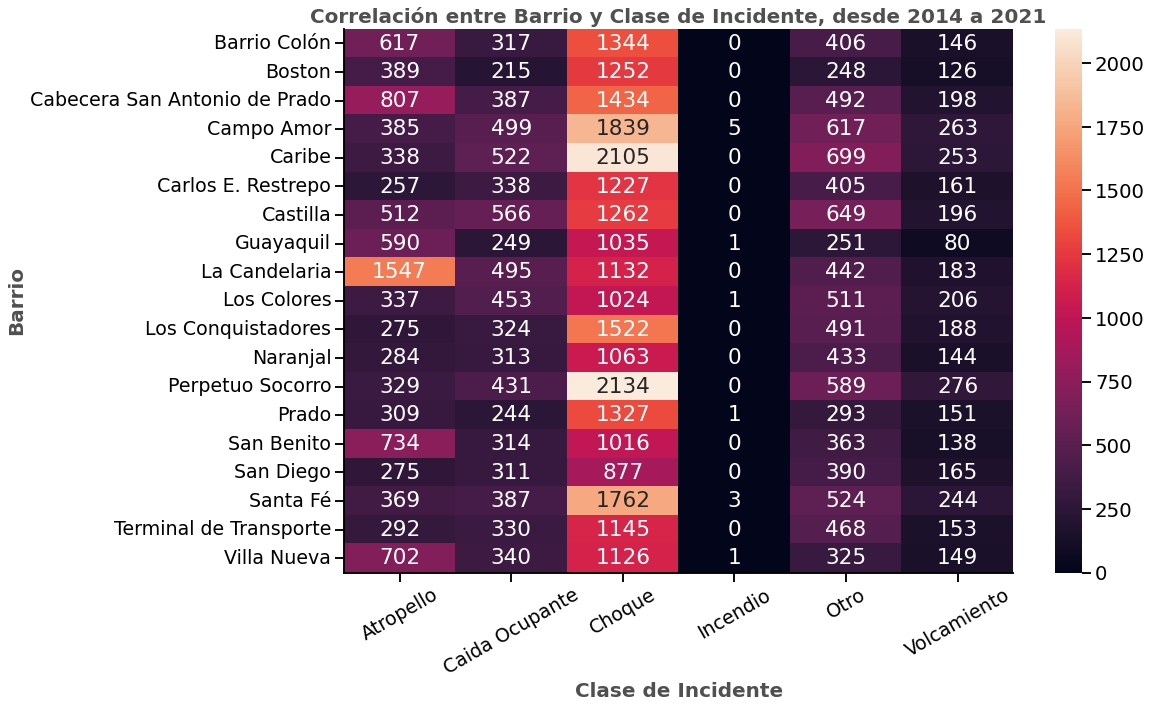

In [439]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(agr_df_barrio, annot=True, fmt='g')

plt.title('Correlación entre Barrio y Clase de Incidente, desde 2014 a 2021', 
            loc='center', color='#505050', fontsize=20, fontweight='bold'
)

plt.ylabel("Barrio", size=20, fontweight='bold', color='#505050')
plt.xlabel("Clase de Incidente", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=19, rotation=30)
plt.yticks(fontsize=19)

sns.despine()


**¿Existe una relación entre las variables Clase_incidente y Condicion**

In [440]:
agr_df_condicion = pd.crosstab(index = imp_barrio_df['Condicion'],
                 columns=imp_barrio_df['Clase_incidente'], 
                 margins=True)# Agrega una columna y fila con totales
agr_df_condicion

Clase_incidente,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento,All
Condicion,,,,,,,
Acompañante de Motocicleta,443,1434,4062,0,1002,570,7511
Ciclista,44,28,1090,0,59,20,1241
Conductor,42,10,1328,0,54,38,1472
Motociclista,1629,4495,16768,5,7196,2728,32821
Pasajero,140,1043,2112,7,225,53,3580
Peatón,7050,25,266,0,60,11,7412
All,9348,7035,25626,12,8596,3420,54037


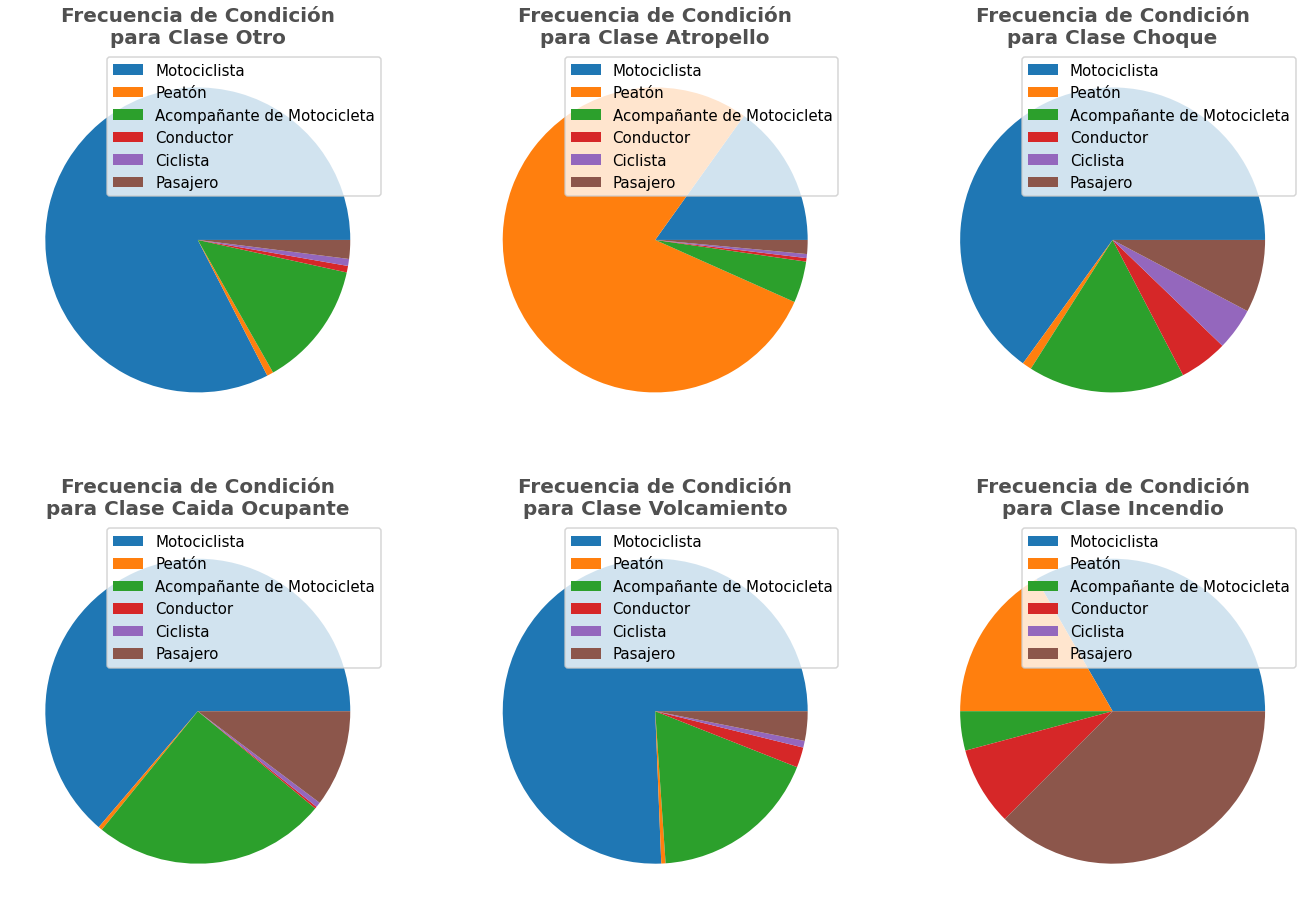

In [441]:
# ANALISIS DE FRECUENCIA DE TIPOS DE INCIDENTES POR CONDICION CON GRAFICOS DE TORTA
colors = sns.color_palette('tab10')

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,12), sharey='row')

fig.subplots_adjust(left=1, right=2, bottom=2.3, top=3.3)
fig.align_ylabels(ax)
fig.align_xlabels(ax)

clase_labels = invia_df.Clase_incidente.unique().tolist()
condition_labels = invia_df.Condicion.unique().tolist()
idx = 0
while idx + 1< len(clase_labels):
  for i in range(2):
    for y in range(3):
        df_equal_clase = invia_df[invia_df['Clase_incidente'] == clase_labels[idx]]
        df_conditions_case = df_equal_clase['Condicion'].value_counts().reindex(invia_df.Condicion.unique(), fill_value=0)

        ax[i,y].set_title('Frecuencia de Condición\npara Clase {}'.format(clase_labels[idx]), 
                          color='#505050', fontsize=20, fontweight='bold')

        ax[i,y].pie(df_conditions_case,
                    explode=None, 
                    colors=colors, 
                    textprops={"fontsize":14},
        )

        ax[i,y].legend(condition_labels, fontsize=15, loc='upper right')

        idx = idx + 1

fig.show()

## Visualización de los Incidentes

In [442]:
# Verificamos que no existen nulos y todos son con comas para evitar que de por error el mapa
imp_barrio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54037 entries, 0 to 54036
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                54037 non-null  int64         
 1   Gravedad_victima     54037 non-null  object        
 2   Fecha_incidente      54037 non-null  datetime64[ns]
 3   Hora_incidente       54037 non-null  object        
 4   Clase_incidente      54037 non-null  object        
 5   Direccion_incidente  54037 non-null  object        
 6   Sexo                 54037 non-null  object        
 7   Edad                 53463 non-null  float64       
 8   Condicion            54037 non-null  object        
 9   Mes                  54037 non-null  object        
 10  Dia                  54037 non-null  object        
 11  Num_dia              54037 non-null  float64       
 12  Hora                 54037 non-null  float64       
 13  Grupo_edad           54037 non-

In [443]:
agrp_imp_barrio_df = imp_barrio_df.groupby(['Barrio', 'Latitud', 'Longitud'])['Clase_incidente'].count().reset_index()
agrp_imp_barrio_df

,Barrio,Latitud,Longitud,Clase_incidente
0,Barrio Colón,-75.570946,6.241729,1
1,Barrio Colón,-75.570235,6.239158,4
2,Barrio Colón,-75.570074,6.237620,1
3,Barrio Colón,-75.569569,6.238881,1
4,Barrio Colón,-75.569374,6.241562,1
...,...,...,...,...
5492,Villa Nueva,6.256023,-75.564100,11
5493,Villa Nueva,6.256355,-75.564988,3
5494,Villa Nueva,6.256358,-75.564911,27
5495,Villa Nueva,6.256597,-75.565315,1


In [444]:
token = 'pk.eyJ1IjoidmdhcmllbCIsImEiOiJjbDNkNTkzYWswMDJhM2lxczlndzk5YjBmIn0.CQG2v9YCWN3ABAi_gJNG1Q'

fig = go.Figure(go.Scattermapbox(
                lon = agrp_imp_barrio_df.Longitud,
                lat = agrp_imp_barrio_df.Latitud,
                mode = "markers+text",
                marker = go.scattermapbox.Marker(size = agrp_imp_barrio_df.Clase_incidente,
                                                 color = agrp_imp_barrio_df.Clase_incidente,
                                                 colorscale = 'Edge',
                                                 showscale = True,
                                                 sizemode = 'diameter',
                                                 opacity = 0.8),
hoverinfo = 'text',
hovertext = '<b>Barrio</b>: ' + agrp_imp_barrio_df['Barrio'].astype(str) + '<br>'
            '<b>Cantidad de Incidentes</b>: ' + agrp_imp_barrio_df['Clase_incidente'].astype(str) + '<br>'))

fig.update_layout(
    hovermode='x',
    margin = dict(r=0, l=0, b=0, t=0),
    mapbox = dict(accesstoken=token, style='stamen-terrain', 
                  zoom=10, center=dict(lat=6.24659, lon= -75.57967)),
    showlegend = True,
    autosize = True                
)